# Figures

This notebook contains code necessary to generate most of the figures for the *Pan* 3D Genome project. I have organized this largely by order of appearance in the manuscript; however, a few sections may be out of order. Use the Table of Contents below to navigate to specific plot.

## Table of Contents

- [Notebook Setup](#notebooksetup)
- [N Variants per Individual](#nvariantsperindividual)
- [Contact Values Distribution](#contactvaluesdistribution)
- [Divergence Distribution](#divergencedistribution)
- [Ultraconserved and Primate-Conserved Window Maxima Distribution](#ultraprimateconserveddistribution)
- [*Pan*-*Homo* Divergence Distribution](#panhomodivergencedistribution)
- [Genome-Wide 3D Divergence Matrix](#genomewidematrix)
- [Genome-Wide 3D Divergence Boxplots](#genomewideboxplots)
- [Window Maxima by Topology](#topologywindowmaxima)
- [Multiple Divergent Individuals Clustering Windows](#mdis)
- [Single Divergent Individual Clustering Windows](#sdis)
- [Interspecific Divergence Distribution in Bonobo-Chimpanzee Divergent Windows](#interspecificdivergencedistribution)
- [*MYO10* Kidney Expression](#myo10kidneyexpression)
- [Gene Expression at First Example Bonobo-Chimpanzee Divergent Window](#firstexampleexpression)
- [Bonobo-Chimpanzee Divergent Windows Main Figure](#ppnptrdivergentwindowsmain)
- [Phenotype Enrichment](#phenotypeenrichmentfigure)
- [*In Silico* Mutagenesis Main Figure](#insilicomutagenesismain)
    - [*In Silico* Mutagenesis Example Window](#insilicomutagenesisexamplewindow)
    - [Explained Divergence](#explaineddivergencefigure)
    - [CTCF](#ctcffigure)
    - [Chromatin Contact Effect](#chromatincontacteffectfigure)
- [Gene Expression at Second Example Bonobo-Chimpanzee Divergent Window](#secondexampleexpression)
- [3D Modifying Variant Mutation Matrix and CpG Counts](#mutationmatrix)
- [Species Differences in Gene Expression](#speciesdifferenceinexpression)
- [Reference Predictions by Cell Type](#referencepredictionsbycelltype)
- [Sample Predictions by Cell Type](#samplepredictionsbycelltype)

## Notebook Setup <a class = 'anchor' id = 'notebooksetup'></a>

Load all needed packages, change directories, set font, and load the main HFF comparisons dataframe that we previously generated.

In [1]:
library(cowplot)
library(ComplexUpset)
library(dplyr)
library(eulerr)
library(ggExtra)
library(ggplot2)
library(ggpubr)
library(reshape2)
library(showtext)
library(stringr)

options(scipen=999)
options(warn=-1)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend


Loading required package: sysfonts

Loading required package: showtextdb



In [2]:
setwd('/wynton/group/capra/projects/pan_3d_genome/figures')

In [3]:
font_add('Arial', '~/fonts/arial.ttf')
showtext_auto()
showtext_opts(dpi = 300)

Set colors we will use in multiple plots.

In [4]:
ppn_pt_color = '#8c510a'
pt_pt_color = '#bf812d'
ppn_color = '#829a2d'
pte_color = '#d77d85'
pts_color = '#cfaf53'
ptt_color = '#d29063'
ptv_color = '#c38dad'

In [5]:
comparisons = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/dataframes/HFF_comparisons.txt', sep = '\t', header = TRUE)
head(comparisons)

,ind1,ind2,lineages,chr,window_start,window,mse,spearman,divergence,seq_diff
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>
1,Akwaya-Jean,Alfred,pte-ptt,chr10,1572864,chr10_1572864,0.0001679965,0.9876550,0.012344984,2803
2,Akwaya-Jean,Alfred,pte-ptt,chr10,2097152,chr10_2097152,0.0004808925,0.9698092,0.030190797,2715
3,Akwaya-Jean,Alfred,pte-ptt,chr10,2621440,chr10_2621440,0.0016745600,0.9963985,0.003601548,2849
4,Akwaya-Jean,Alfred,pte-ptt,chr10,3145728,chr10_3145728,0.0003225794,0.9978993,0.002100716,2606
5,Akwaya-Jean,Alfred,pte-ptt,chr10,3670016,chr10_3670016,0.0001429828,0.9967316,0.003268396,2594
6,Akwaya-Jean,Alfred,pte-ptt,chr10,4194304,chr10_4194304,0.0022898065,0.9975879,0.002412069,2885


In [6]:
nrow(comparisons)

[1] 6669390

Set up general aesthetics for figures. These can be overriden when needed.

In [7]:
fig_theme = theme_classic() + theme(axis.line.x.bottom = element_line(size = (0.125/0.377)),
                                      axis.line.y.left = element_line(size = (0.125/0.377)),
                                      axis.title = element_text(size = 10), 
                                      axis.text.x = element_text(size = 9), 
                                      axis.text.y = element_text(size = 9),
                                      axis.ticks = element_line(size = (0.125/0.377)),
                                      legend.position = 'none', 
                                      text = element_text(family = 'Arial'))

## N Variants per Individual <a class = 'anchor' id = 'nvariantsperindividual'></a>

In [8]:
n_variants = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/metadata/n_variants.txt', sep = '\t', header = FALSE)
colnames(n_variants) <- c('id','lineage','n_variants','pass')
n_variants$lineage <- factor(n_variants$lineage , levels = c('ppn', 'ptt', 'pts', 'pte', 'ptv'))
n_variants <- n_variants[order(n_variants$lineage, -n_variants$n_variants),]
n_variants$id <- factor(n_variants$id, levels = n_variants$id)
head(n_variants)

,id,lineage,n_variants,pass
,<fct>,<fct>,<int>,<chr>
44,Kumbuka,ppn,9393495,included
40,Kombote,ppn,9214395,included
12,Bono,ppn,9198721,included
26,Desmond,ppn,9181795,included
28,Dzeeta,ppn,9166793,included
33,Hortense,ppn,9164493,included


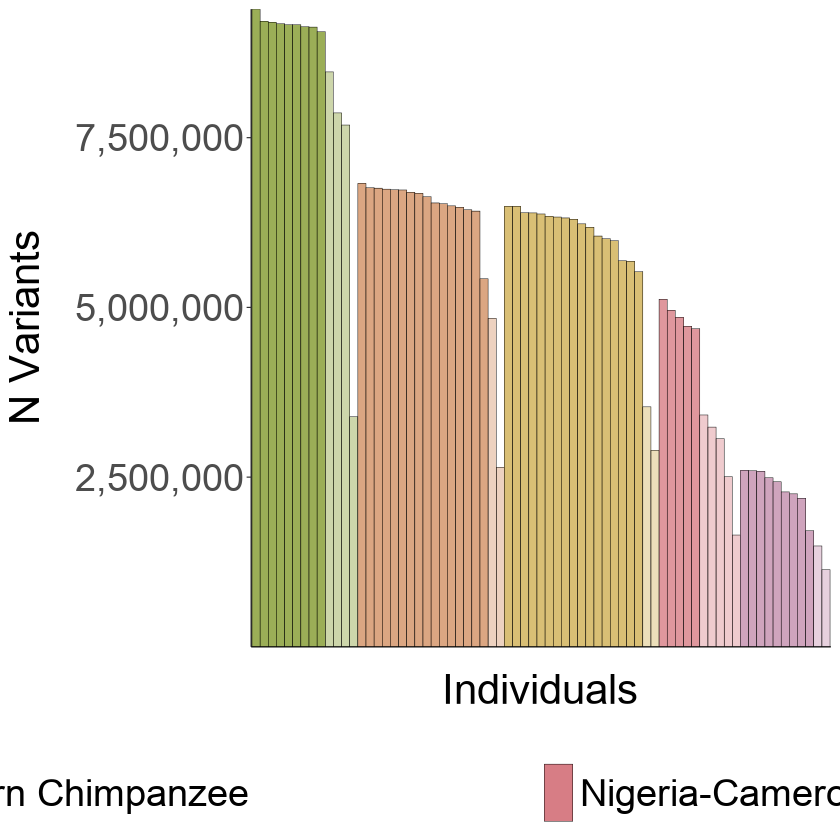

In [9]:
n_variants_plot <- ggplot(n_variants, aes(x = id, y = n_variants, fill = lineage, alpha = pass)) + geom_bar(stat = 'identity', color = 'black', size = (0.05/0.377), width = 1) + #color = 'black', size = (0.125/0.377),
xlab('\nIndividuals\n') + ylab('N Variants\n') +
scale_y_continuous(breaks = c(2500000, 5000000, 7500000), labels = c('2,500,000','5,000,000','7,500,000'), expand = c(0, 0), limits = c(0, NA)) +
scale_fill_manual(labels = c('Bonobo', 'Central Chimpanzee', 'Eastern Chimpanzee', 'Nigeria-Cameroon Chimpanzee', 'Western Chimpanzee'), name = '', values = c(ppn_color, ptt_color, pts_color, pte_color, ptv_color)) +
scale_alpha_discrete(breaks = c('excluded', 'included'), guide = 'none', range = c(0.4, 0.8)) +
fig_theme + theme(axis.ticks.x = element_blank(), axis.text.x = element_blank(), legend.position = 'bottom', legend.title = element_text(size = 9), legend.text = element_text(face = 'italic', size = 9)) +
guides(fill = guide_legend(nrow = 1, byrow = TRUE)) + theme(legend.text = element_text(margin = margin(r = 35, unit = 'pt')), legend.spacing.x = unit(0.16, 'cm'))

n_variants_plot

In [10]:
pdf('suppl_figs/n_variants_plot.pdf', width = 10, height = 5)
n_variants_plot
dev.off()

png 
  2

## Contact Values Distribution <a class = 'anchor' id = 'contactvaluesdistribution'></a>

In [11]:
random_contacts = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/metadata/random.txt', sep = '\t', header = FALSE)
head(random_contacts)

,V1
,<dbl>
1,-0.07969698
2,-0.08148655
3,0.12285706
4,-0.47345644
5,-0.15916070
6,0.16127333


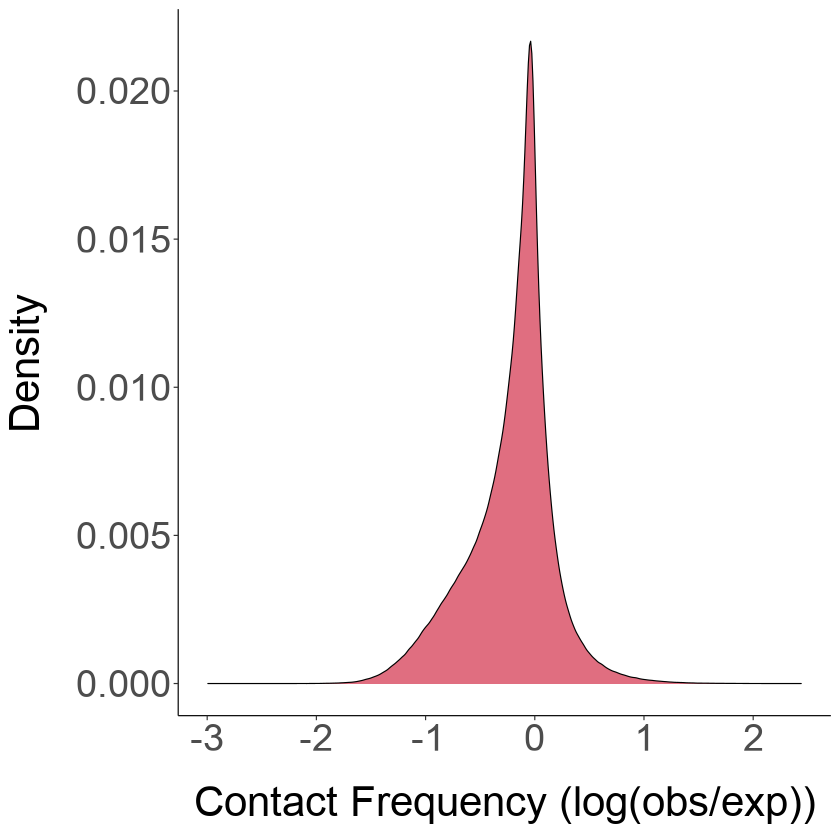

In [12]:
contact_frequencies_distribution_plot <- ggplot(random_contacts, aes(V1, ..count../sum(..count..))) + geom_density(fill = '#cc0e2c', alpha = 0.6, size = (0.125/0.377)) + 
xlab('\nContact Frequency (log(obs/exp))') + ylab('Density\n') + fig_theme

contact_frequencies_distribution_plot

In [13]:
pdf('suppl_figs/contact_frequencies_distribution_plot.pdf', height = 8, width = 8)
contact_frequencies_distribution_plot
dev.off()

png 
  2

## Divergence Distribution <a class = 'anchor' id = 'divergencedistribution'></a>

In [14]:
divergence_palette_bounds <- colorRampPalette(c('#fcfbfd', '#6a51a3'))
num_colors <- 44
divergence_palette <- divergence_palette_bounds(44)

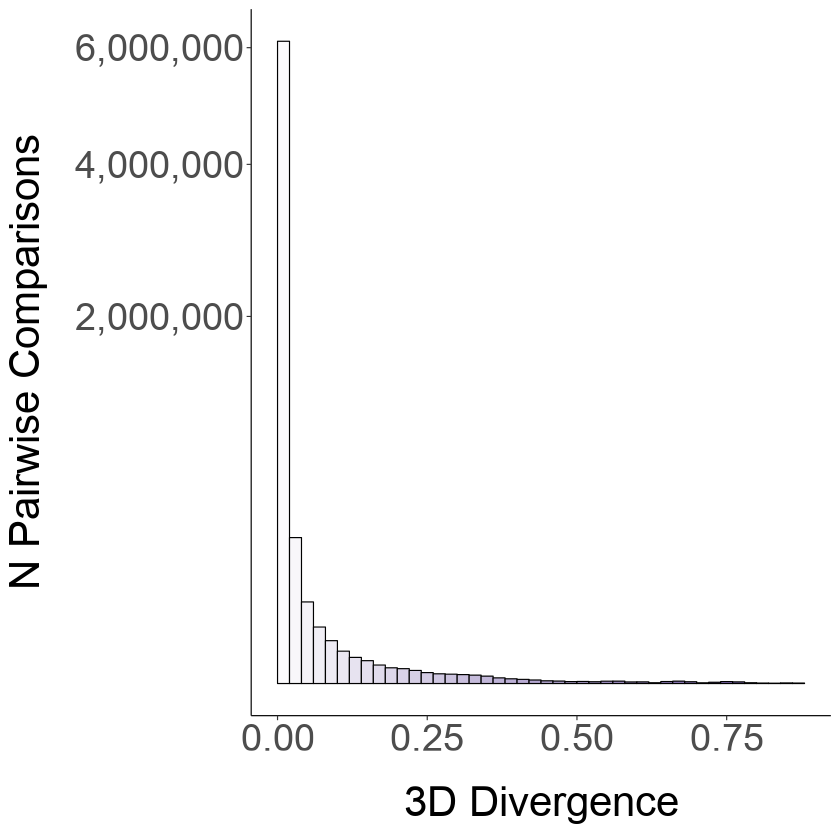

In [15]:
all_comparisons_divergence_histogram = ggplot(comparisons, aes(x = divergence, fill = factor(..x..))) + geom_histogram(binwidth = 0.02, center = 0.01, color = 'black', size = (0.125/0.377)) +
xlab('\n3D Divergence') + ylab('N Pairwise Comparisons\n') + coord_trans(y = 'sqrt') +
scale_y_continuous(breaks = c(2000000, 4000000, 6000000), labels = c('2,000,000','4,000,000','6,000,000')) +
scale_fill_manual(values = divergence_palette) + theme_classic() + theme(text = element_text(family = 'Arial')) +
theme(axis.line.x.bottom = element_line(size = (0.125/0.377)), axis.line.y.left = element_line(size = (0.125/0.377)), 
      axis.title = element_text(size = 10), axis.text.x = element_text(size = 9), axis.text.y = element_text(size = 9),
      axis.ticks = element_line(size = (0.125/0.377)), legend.position = 'none')

all_comparisons_divergence_histogram

In [16]:
pdf('main_fig_components/all_comparisons_divergence_histogram.pdf', width = 6,  height = 6)
all_comparisons_divergence_histogram
dev.off()

png 
  2

Create an inset. Note the constant for the text size to ensure that a smaller dimension file for the inset results in the same font size as the figure above.

In [17]:
high_divergence_palette = divergence_palette[11:44]

In [18]:
high_divergence_comparisons <- subset(comparisons, divergence >= 0.2)
head(high_divergence_comparisons)

,ind1,ind2,lineages,chr,window_start,window,mse,spearman,divergence,seq_diff
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>
2323,Akwaya-Jean,Alfred,pte-ptt,chr2B,79691776,chr2B_79691776,0.004675024,0.7875654,0.2124346,2471
2573,Akwaya-Jean,Alfred,pte-ptt,chr3,93847552,chr3_93847552,0.003550734,0.7783207,0.2216793,3103
2874,Akwaya-Jean,Alfred,pte-ptt,chr4,68681728,chr4_68681728,0.004156115,0.7415150,0.2584850,3415
3488,Akwaya-Jean,Alfred,pte-ptt,chr6,90177536,chr6_90177536,0.008007103,0.6913133,0.3086867,2276
6330,Akwaya-Jean,Alice,pte-ptv,chr2A,21495808,chr2A_21495808,0.015962159,0.7649633,0.2350367,2224
6331,Akwaya-Jean,Alice,pte-ptv,chr2A,22020096,chr2A_22020096,0.014963722,0.6577698,0.3422302,2240


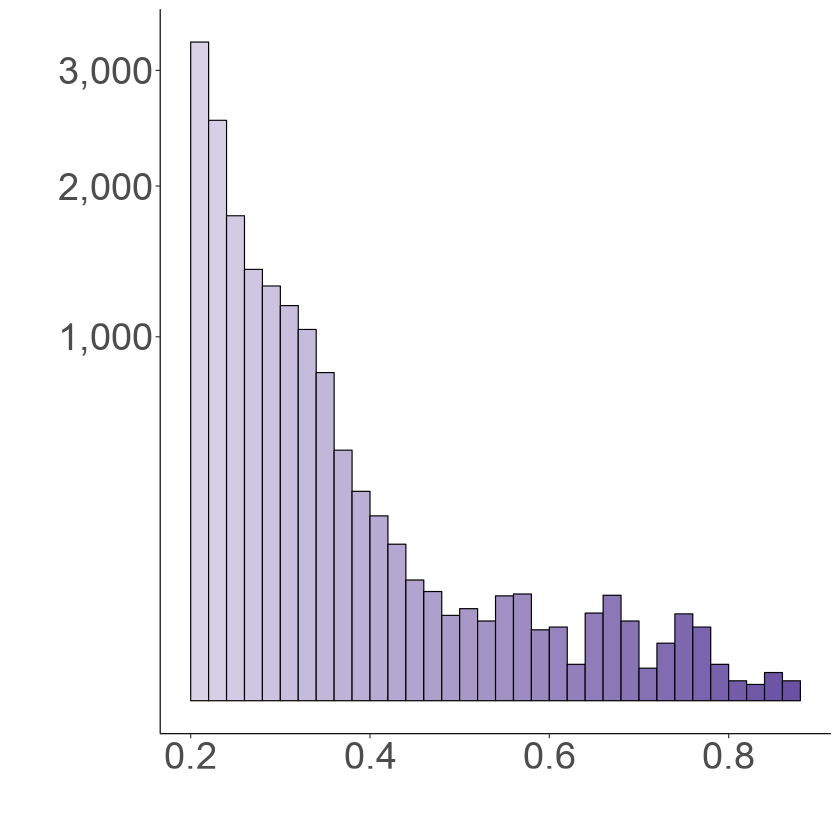

In [19]:
all_comparisons_divergence_histogram_inset <- ggplot(high_divergence_comparisons, aes(x = divergence, fill = factor(..x..))) + geom_histogram(binwidth = 0.02, center = 0.01, color = 'black', position = 'identity', size = (0.125/0.377)) +
xlab('') + ylab('') + scale_y_continuous(breaks = c(0,1000,2000,3000), labels = c('0','1,000','2,000','3,000')) + coord_trans(y = 'sqrt') +
scale_fill_manual(values = high_divergence_palette) + theme_classic() + theme(text = element_text(family = 'Arial')) +
theme(axis.line.x.bottom = element_line(size = (0.125/0.377)), axis.line.y.left = element_line(size = (0.125/0.377)),
      axis.title = element_text(size = 10), axis.text.x = element_text(size = 9), axis.text.y = element_text(size = 9),
      axis.ticks = element_line(size = (0.125/0.377)), legend.position = 'none')

all_comparisons_divergence_histogram_inset

In [20]:
pdf('main_fig_components/all_comparisons_divergence_histogram_inset.pdf', width = 4.2, height = 4)
all_comparisons_divergence_histogram_inset
dev.off()

png 
  2

## Ultraconserved and Primate-Conserved Window Maxima Distribution <a class = 'anchor' id = 'ultraprimateconserveddistribution'></a>

In [21]:
window_maxes = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/Okhovat_et_al_2023/window_maxes.txt', sep = '\t', header = FALSE)
colnames(window_maxes) <- c('max')
window_maxes$dist <- 'Genome-Wide'
head(window_maxes)

,max,dist
,<dbl>,<chr>
1,0.12895897,Genome-Wide
2,0.10149728,Genome-Wide
3,0.03360769,Genome-Wide
4,0.13884825,Genome-Wide
5,0.03186678,Genome-Wide
6,0.08244390,Genome-Wide


In [22]:
primate_conserved_maxes = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/Okhovat_et_al_2023/primate_conserved_window_maxes.txt', sep = '\t', header = FALSE)
colnames(primate_conserved_maxes) <- c('max')
primate_conserved_maxes$dist <- 'Primate-Conserved'
head(primate_conserved_maxes)

,max,dist
,<dbl>,<chr>
1,0.140252595,Primate-Conserved
2,0.039723780,Primate-Conserved
3,0.028704889,Primate-Conserved
4,0.015983505,Primate-Conserved
5,0.009440741,Primate-Conserved
6,0.009440741,Primate-Conserved


In [23]:
primate_conserved_maxes <- rbind(window_maxes, primate_conserved_maxes)

In [24]:
primate_conserved_significance_label <- bquote('Komolgorov-Smirnov, K = 0.13, P = 8.71 x 10'^'-6')

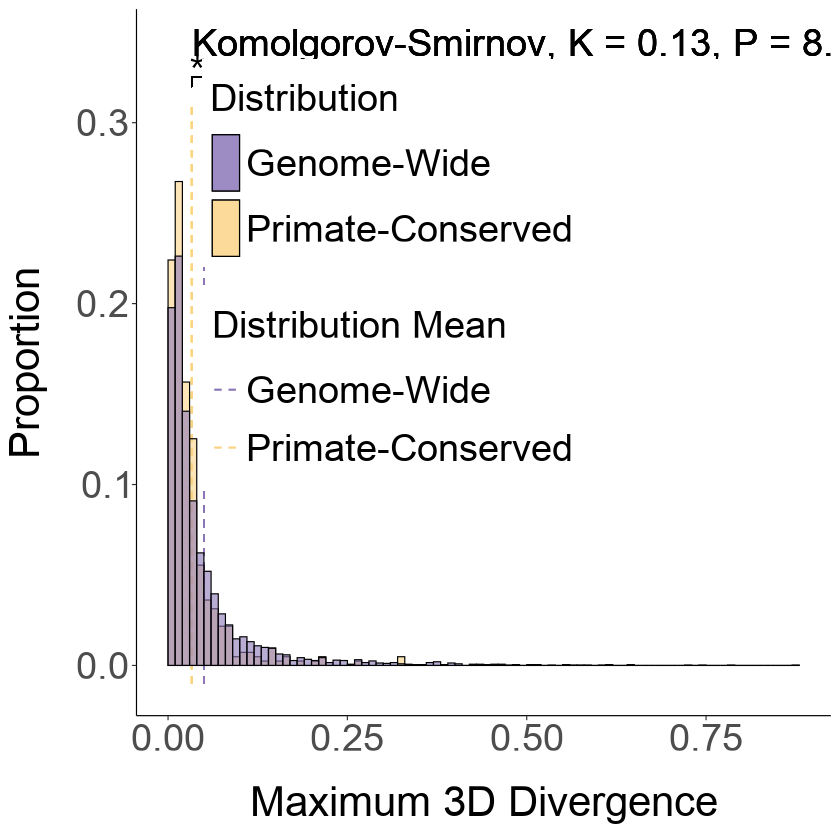

In [25]:
primate_conserved_maxes_histogram <- ggplot(primate_conserved_maxes, aes(x = max)) +
geom_segment(aes(x = 0.05016095426516081, y = -0.01, xend = 0.05016095426516081, yend = 0.31, colour = 'Genome-Wide'), linetype = 'dashed', size = 0.5) +
geom_segment(aes(x = 0.03320046814213971, y = -0.01, xend = 0.03320046814213971, yend = 0.31, colour = 'Primate-Conserved'), linetype = 'dashed', size = 0.5) +
geom_histogram(data = subset(primate_conserved_maxes, dist == 'Primate-Conserved'), aes(x = max, y = ..count../sum(..count..), fill = dist), binwidth = 0.01, center = 0.005, color = 'black', alpha = 0.6, size = (0.125/0.377)) +
geom_histogram(data = subset(primate_conserved_maxes, dist == 'Genome-Wide'), aes(x = max, y = ..count../sum(..count..), fill = dist), binwidth = 0.01, center = 0.005, color = 'black', alpha = 0.6, size = (0.125/0.377)) +
geom_segment(x = 0.03320046814213971, y = 0.32, xend = 0.03320046814213971, yend = 0.325, size = (0.125/0.377), lineend = 'round') +
geom_segment(x = 0.03320046814213971, y = 0.325, xend = 0.05016095426516081, yend = 0.325, size = (0.125/0.377), lineend = 'round') +
geom_segment(x = 0.05016095426516081, y = 0.32, xend = 0.05016095426516081, yend = 0.325, size = (0.125/0.377), lineend = 'round') +
annotate('text', x = ((0.05016095426516081 - 0.03320046814213971)/2) + 0.03320046814213971, y = 0.33, label = '*', size = 9/.pt) +
annotate('text', 0.03320046814213971, y = 0.345, label = primate_conserved_significance_label, family = 'Arial', size = 9/.pt, hjust = 0) +
scale_fill_manual(name = 'Distribution', values = c('#8a76b7','#fbd387')) +
scale_colour_manual(name = 'Distribution Mean', values = c('Genome-Wide' = '#8a76b7', 'Primate-Conserved' = '#fbd387')) +
xlab('\nMaximum 3D Divergence') + ylab('Proportion\n') + fig_theme +
theme(legend.position = c(0.95, 0.93), legend.justification = c('right', 'top'), legend.box.just = 'right', legend.margin = margin(6, 6, 6, 6)) +
guides(fill = guide_legend(byrow = TRUE)) +
theme(legend.title = element_text(size = 9), legend.text = element_text(size = 9)) # legend.key.size = unit(0.2, 'cm') #legend.spacing.x = unit(1.0, 'cm')

primate_conserved_maxes_histogram

In [26]:
ultraconserved_maxes = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/Okhovat_et_al_2023/ultraconserved_window_maxes.txt', sep = '\t', header = FALSE)
colnames(ultraconserved_maxes) <- c('max')
ultraconserved_maxes$dist <- 'Ultra-Conserved'
head(ultraconserved_maxes)

,max,dist
,<dbl>,<chr>
1,0.036526326,Ultra-Conserved
2,0.006578745,Ultra-Conserved
3,0.017641361,Ultra-Conserved
4,0.002978481,Ultra-Conserved
5,0.021275480,Ultra-Conserved
6,0.008742262,Ultra-Conserved


In [27]:
ultraconserved_maxes <- rbind(window_maxes, ultraconserved_maxes)

In [28]:
head(ultraconserved_maxes)

,max,dist
,<dbl>,<chr>
1,0.12895897,Genome-Wide
2,0.10149728,Genome-Wide
3,0.03360769,Genome-Wide
4,0.13884825,Genome-Wide
5,0.03186678,Genome-Wide
6,0.08244390,Genome-Wide


In [29]:
nrow(ultraconserved_maxes)

[1] 5335

In [30]:
ultraconserved_significance_label <- bquote('Komolgorov-Smirnov, K = 0.18, P = 5.26 x 10'^'-22')

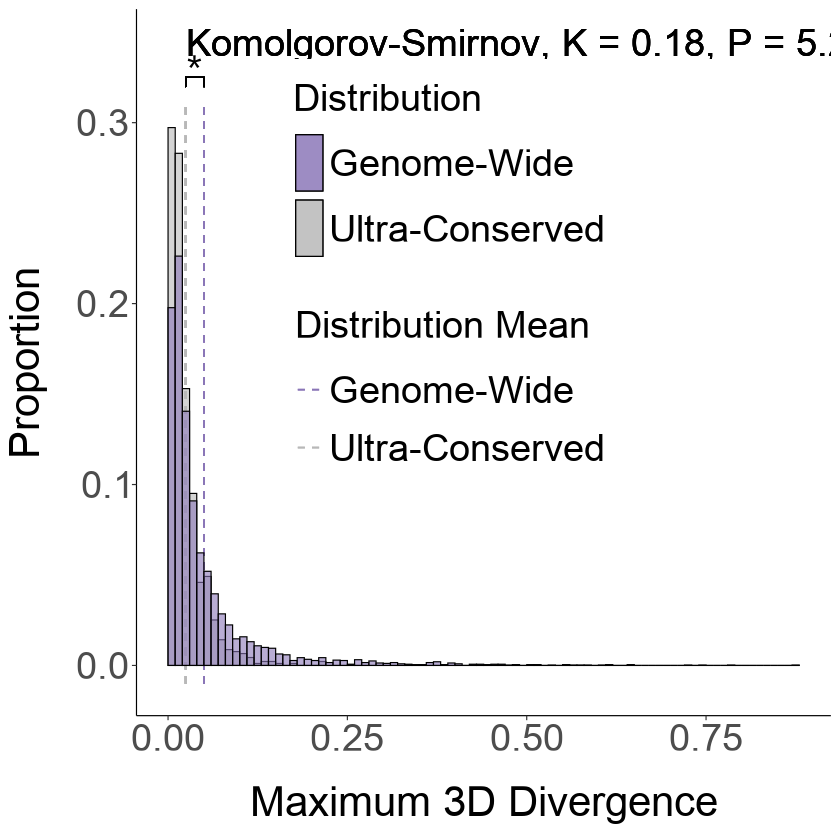

In [31]:
ultraconserved_maxes_histogram <- ggplot(ultraconserved_maxes, aes(x = max)) +
geom_segment(aes(x = 0.05016095426516081, y = -0.01, xend = 0.05016095426516081, yend = 0.31, colour = 'Genome-Wide'), linetype = 'dashed', size = 0.5) +
geom_segment(aes(x = 0.02460737114364039, y = -0.01, xend = 0.02460737114364039, yend = 0.31, colour = 'Ultra-Conserved'), linetype = 'dashed', size = 0.5) +
geom_histogram(data = subset(ultraconserved_maxes, dist == 'Ultra-Conserved'), aes(x = max, y = ..count../sum(..count..), fill = dist), binwidth = 0.01, center = 0.005, color = 'black', alpha = 0.6, size = (0.125/0.377)) +
geom_histogram(data = subset(ultraconserved_maxes, dist == 'Genome-Wide'), aes(x = max, y = ..count../sum(..count..), fill = dist), binwidth = 0.01, center = 0.005, color = 'black', alpha = 0.6, size = (0.125/0.377)) +
geom_segment(x = 0.02460737114364039, y = 0.32, xend = 0.02460737114364039, yend = 0.325, size = (0.125/0.377), lineend = 'round') +
geom_segment(x = 0.02460737114364039, y = 0.325, xend = 0.05016095426516081, yend = 0.325, size = (0.125/0.377), lineend = 'round') +
geom_segment(x = 0.05016095426516081, y = 0.32, xend = 0.05016095426516081, yend = 0.325, size = (0.125/0.377), lineend = 'round') +
annotate('text', x = ((0.05016095426516081 - 0.02460737114364039)/2) + 0.02460737114364039, y = 0.33, label = '*', size = 9/.pt) +
annotate('text', x = 0.02460737114364039, y = 0.345, label = ultraconserved_significance_label, family = 'Arial', size = 9/.pt, hjust = 0) +
scale_fill_manual(name = 'Distribution', values = c('#8a76b7','#b8b8b8')) +
scale_colour_manual(name = 'Distribution Mean', values = c('Genome-Wide' = '#8a76b7', 'Ultra-Conserved' = '#b8b8b8')) +
xlab('\nMaximum 3D Divergence') + ylab('Proportion\n') + fig_theme +
theme(legend.position = c(0.95, 0.93), legend.justification = c('right', 'top'), legend.box.just = 'right', legend.margin = margin(6, 6, 6, 6)) +
guides(fill = guide_legend(byrow = TRUE)) +
theme(legend.title = element_text(size = 9), legend.text = element_text(size = 9)) # legend.key.size = unit(0.2, 'cm') #legend.spacing.x = unit(1.0, 'cm')

ultraconserved_maxes_histogram

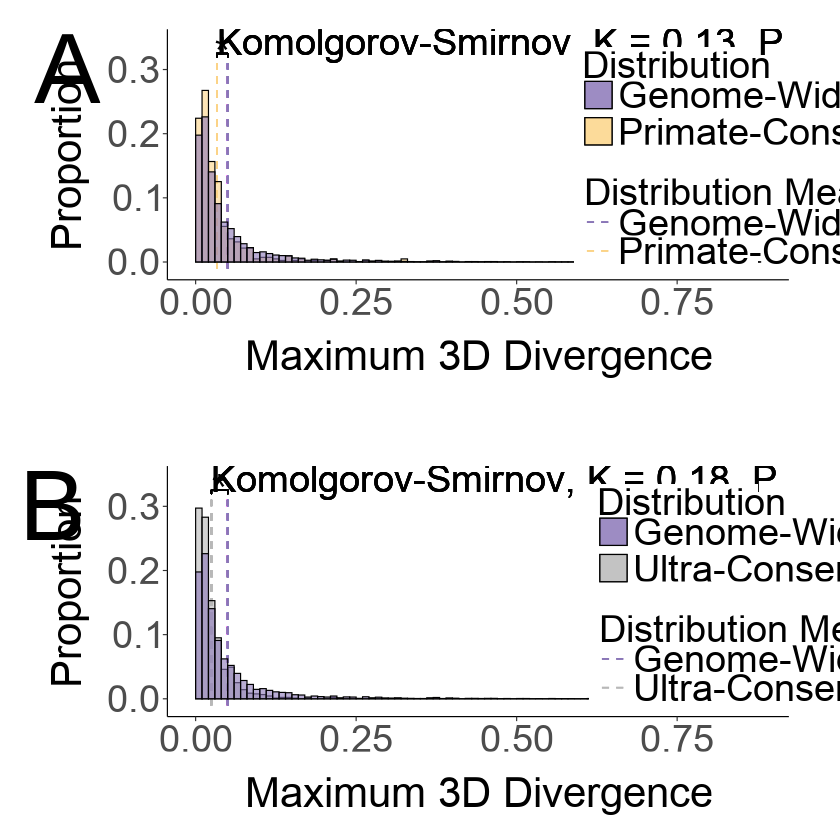

In [32]:
column <- plot_grid(primate_conserved_maxes_histogram, NULL, ultraconserved_maxes_histogram, labels = c('A','','B'), label_size = 24, label_fontface = 'plain', rel_heights = c(0.48,0.04,0.48), ncol = 1, scale = 0.9)
column

In [33]:
pdf('suppl_figs/primate_conserved_ultraconserved_window_maximum_histograms.pdf', height = 10, width = 10)
column
dev.off()

png 
  2

## Pan-Homo Divergence Distribution <a class = 'anchor' id = 'panhomodivergencedistribution'></a>

In [34]:
#human_comparisons = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/comparisons/thousand_genomes_subset_HFF/1KG_subsample_divergence.txt', sep = ',', header = TRUE)
#human_comparisons$genus <- 'Homo'
#head(human_comparisons)

In [35]:
#nrow(human_comparisons)

In [36]:
#pan_comparisons <- subset(comparisons, subset = !(chr == 'chrX'), select = c('divergence'))
#pan_comparisons$genus <- 'Pan'
#head(pan_comparisons)

In [37]:
#nrow(pan_comparisons)

In [38]:
#pan_homo_comparisons <- rbind(human_comparisons, pan_comparisons)

In [39]:
#0.001^(1/3)

In [40]:
#0.01^(1/3)

In [41]:
#0.1^(1/3)

In [42]:
#0.9^(1/3)

In [43]:
#pan_homo_all_comparisons_divergence_histogram <- ggplot(pan_homo_comparisons, aes(x = divergence)) + 
#geom_histogram(data = subset(pan_homo_comparisons, genus == 'Homo'), aes(x = divergence, y = (..count../sum(..count..))^(1/3), fill = genus), binwidth = 0.01, center = 0.005, color = 'black', alpha = 0.6, size = (0.125/0.377)) + 
#geom_histogram(data = subset(pan_homo_comparisons, genus == 'Pan'), aes(x = divergence, y = (..count../sum(..count..))^(1/3), fill = genus), binwidth = 0.01, center = 0.005, color = 'black', alpha = 0.6, size = (0.125/0.377)) +
#scale_y_continuous(breaks = c(0.1,0.215443469003188,0.464158883361278,0.96548938460563), labels = c(0.001,0.01,0.1,0.9)) +
#scale_fill_manual(name = 'Distribution', values = c('#71c3e5','#8a76b7')) +
#xlab('\n3D Divergence') + ylab('Proportion of Pairwise Comparisons\n') + fig_theme + #coord_trans(y = 'sqrt') 
#theme(legend.position = c(0.93, 0.93), legend.justification = c('right', 'top'), legend.box.just = 'right', legend.margin = margin(30, 30, 30, 30)) +
#guides(fill = guide_legend(byrow = TRUE)) + theme(legend.title = element_text(size = 9), legend.text = element_text(size = 9)) # text won't italicize here so must be done manually
#pan_homo_all_comparisons_divergence_histogram

In [44]:
#pdf('suppl_figs/pan_homo_all_comparisons_divergence_histogram_comparison.pdf', width = 10, height = 6)
#pan_homo_all_comparisons_divergence_histogram
#dev.off()

## Genome-Wide 3D Divergence Matrix <a class = 'anchor' id = 'genomewidematrix'></a>

Calculate mean pairwise divergence between all pairs of individuals.

In [45]:
mean_pairwise_divergence = aggregate(divergence ~ ind1 + ind2, data = comparisons, FUN = mean)
mean_pairwise_divergence$ind1 <- as.factor(mean_pairwise_divergence$ind1)
mean_pairwise_divergence$ind2 <- as.factor(mean_pairwise_divergence$ind2)
mean_pairwise_divergence$divergence <- as.numeric(mean_pairwise_divergence$divergence)
head(mean_pairwise_divergence)

,ind1,ind2,divergence
,<fct>,<fct>,<dbl>
1,Akwaya-Jean,Alfred,0.007259394
2,Akwaya-Jean,Alice,0.005878872
3,Alfred,Alice,0.007979371
4,Akwaya-Jean,Andromeda,0.006831268
5,Alfred,Andromeda,0.006851950
6,Alice,Andromeda,0.006648872


Create a symmetric matrix from these data with '0's for the diagonals.

In [46]:
IDs <- sort(unique(c(as.character(mean_pairwise_divergence$ind1), as.character(mean_pairwise_divergence$ind2))))
mean_pairwise_divergence_matrix <- matrix(NA, nrow = 56, ncol = 56, dimnames = list(IDs, IDs))
diag(mean_pairwise_divergence_matrix) <- 0

mean_pairwise_divergence_matrix[as.matrix(mean_pairwise_divergence[, 1:2])] <- mean_pairwise_divergence[,3]
mean_pairwise_divergence_matrix[is.na(mean_pairwise_divergence_matrix)] <- 0
mean_pairwise_divergence_matrix <- mean_pairwise_divergence_matrix + t(mean_pairwise_divergence_matrix)

In [47]:
head(mean_pairwise_divergence_matrix)

,Akwaya-Jean,Alfred,Alice,Andromeda,Athanga,Berta,Bihati,Blanquita,Bono,Bosco,⋯,SeppToni,Taweh,Tibe,Tongo,Trixie,Ula,Vaillant,Vincent,Washu,Yogui
Akwaya-Jean,0.000000000,0.007259394,0.005878872,0.006831268,0.007519611,0.005879428,0.006814017,0.007590535,0.01136031,0.005776228,⋯,0.006119049,0.004147638,0.007163298,0.007113874,0.007497796,0.007706850,0.007484937,0.007159865,0.007145899,0.007281559
Alfred,0.007259394,0.000000000,0.007979371,0.006851950,0.007253781,0.007867211,0.007041899,0.006016710,0.01181237,0.007870127,⋯,0.008227124,0.007354917,0.006477226,0.006974906,0.007348317,0.006728189,0.006838622,0.007256572,0.007359787,0.006437325
Alice,0.005878872,0.007979371,0.000000000,0.006648872,0.007863039,0.002791165,0.006966017,0.008040127,0.01042843,0.002457807,⋯,0.002674750,0.005990156,0.007275173,0.007279725,0.007537894,0.007873593,0.008314888,0.007306473,0.007726933,0.007666932
Andromeda,0.006831268,0.006851950,0.006648872,0.000000000,0.005597327,0.006661055,0.005340643,0.006453835,0.01091377,0.006736312,⋯,0.006783047,0.006709758,0.006526131,0.005339436,0.005376073,0.006544781,0.006685826,0.004282637,0.005507983,0.006694648
Athanga,0.007519611,0.007253781,0.007863039,0.005597327,0.000000000,0.007705001,0.005451620,0.006819011,0.01181491,0.007790023,⋯,0.007927406,0.007563159,0.006914957,0.005227979,0.005603619,0.007036638,0.007563723,0.005824009,0.005893105,0.007117535
Berta,0.005879428,0.007867211,0.002791165,0.006661055,0.007705001,0.000000000,0.006815288,0.007849158,0.01054673,0.002686919,⋯,0.003102045,0.006072190,0.007167807,0.007141306,0.007462923,0.007819146,0.008261291,0.007156262,0.007639440,0.007477932


Plot a heatmap which will reorder the individuals to cluster like individuals together.

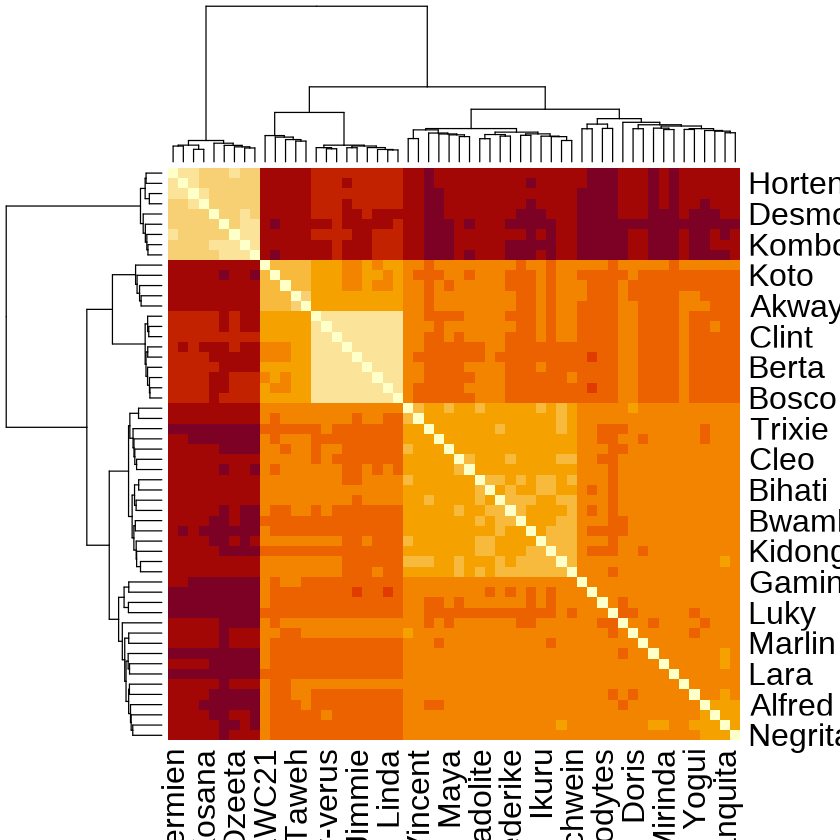

In [48]:
heatmap(mean_pairwise_divergence_matrix, symm=TRUE)

Get the order of the rows and columns from the hierarchical clustering.

[1] "Hermien"           "Hortense"          "Natalie"          
 [4] "Kosana"            "Desmond"           "Kumbuka"          
 [7] "Dzeeta"            "Kombote"           "Bono"             
[10] "Julie-LWC21"       "Koto"              "Damian"           
[13] "Taweh"             "Akwaya-Jean"       "Koby"             
[16] "Cindy-verus"       "Clint"             "SeppToni"         
[19] "Jimmie"            "Berta"             "Alice"            
[22] "Linda"             "Bosco"             "Andromeda"        
[25] "Vincent"           "Trixie"            "Washu"            
[28] "Maya"              "Cleo"              "Coco-chimp"       
[31] "Mgbadolite"        "Bihati"            "Tongo"            
[34] "Frederike"         "Bwamble"           "Athanga"          
[37] "Ikuru"             "Kidongo"           "Nakuu"            
[40] "Cindy-schwein"     "Gamin"             "Vaillant"         
[43] "Cindy-troglodytes" "Luky"              "Julie-A959"       
[46] "Doris"             "Marlin"            "Ula"              
[49] "Mirinda"           "Lara"              "Tibe"             
[52] "Yogui"             "Alfred"            "Brigitta"         
[55] "Blanquita"         "Negrita"

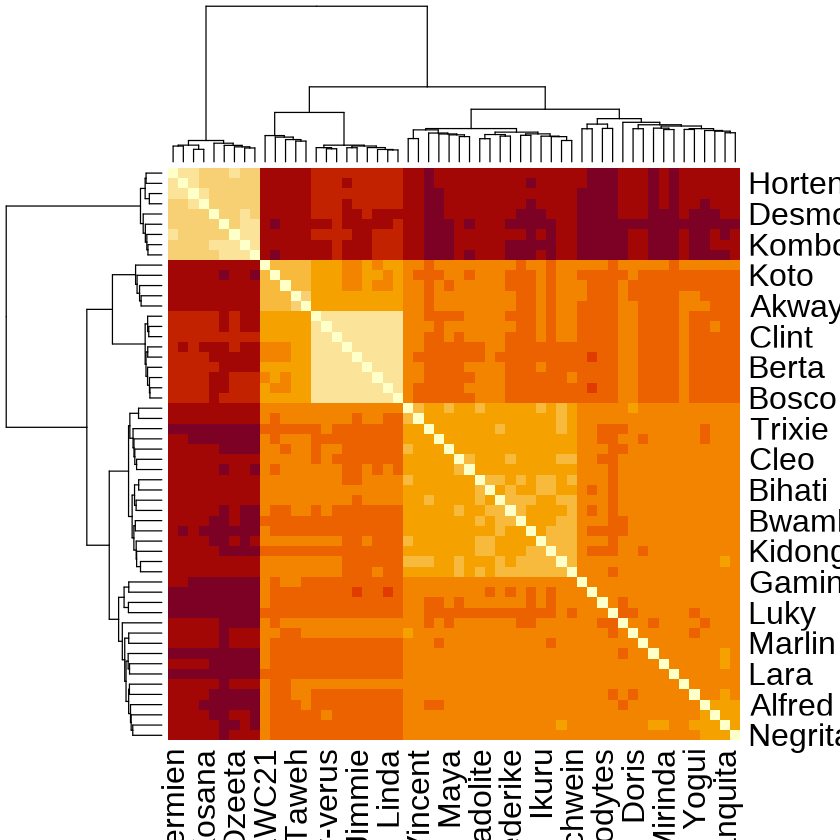

In [49]:
mean_pairwise_divergence_matrix_heatmap <- heatmap(mean_pairwise_divergence_matrix, symm=TRUE)
reordered_mean_pairwise_divergence_matrix_heatmap <- mean_pairwise_divergence_matrix[mean_pairwise_divergence_matrix_heatmap$rowInd, mean_pairwise_divergence_matrix_heatmap$colInd]
reordered_IDs <- colnames(mean_pairwise_divergence_matrix[mean_pairwise_divergence_matrix_heatmap$rowInd, mean_pairwise_divergence_matrix_heatmap$colInd])
reordered_IDs

Check the reordered matrix values to ensure the values are plotted correctly.

In [50]:
head(mean_pairwise_divergence_matrix[mean_pairwise_divergence_matrix_heatmap$rowInd, mean_pairwise_divergence_matrix_heatmap$colInd])

,Hermien,Hortense,Natalie,Kosana,Desmond,Kumbuka,Dzeeta,Kombote,Bono,Julie-LWC21,⋯,Marlin,Ula,Mirinda,Lara,Tibe,Yogui,Alfred,Brigitta,Blanquita,Negrita
Hermien,0.000000000,0.003140162,0.003117064,0.003172113,0.003202096,0.003521852,0.002979029,0.003286032,0.003277155,0.01069598,⋯,0.01101226,0.01170295,0.01128910,0.01172832,0.01104119,0.01123060,0.01121024,0.01109977,0.01111533,0.01093175
Hortense,0.003140162,0.000000000,0.002992415,0.003289090,0.003746767,0.003603656,0.003461268,0.003638136,0.003516792,0.01075450,⋯,0.01094775,0.01160303,0.01136036,0.01179726,0.01108769,0.01127352,0.01127319,0.01115198,0.01122766,0.01098297
Natalie,0.003117064,0.002992415,0.000000000,0.002470764,0.003453078,0.003226130,0.003275121,0.003516526,0.003384817,0.01068462,⋯,0.01106664,0.01168989,0.01138095,0.01181547,0.01109196,0.01125897,0.01127786,0.01124674,0.01115413,0.01092925
Kosana,0.003172113,0.003289090,0.002470764,0.000000000,0.003282296,0.003249147,0.003245317,0.003446929,0.003457169,0.01089191,⋯,0.01131867,0.01178661,0.01150988,0.01201252,0.01111116,0.01129132,0.01152130,0.01139038,0.01141353,0.01117454
Desmond,0.003202096,0.003746767,0.003453078,0.003282296,0.000000000,0.003620203,0.003287158,0.003135748,0.003522948,0.01098800,⋯,0.01128965,0.01202022,0.01168458,0.01201503,0.01142092,0.01161334,0.01165948,0.01152274,0.01148629,0.01126292
Kumbuka,0.003521852,0.003603656,0.003226130,0.003249147,0.003620203,0.000000000,0.003153075,0.003053338,0.002916864,0.01128799,⋯,0.01169416,0.01221301,0.01191025,0.01235461,0.01152691,0.01173022,0.01180699,0.01166276,0.01174307,0.01155958


Save this map.

In [51]:
pdf('suppl_figs/symmetrical_mean_3d_divergence_heatmap.pdf', height = 15, width = 15)
heatmap(mean_pairwise_divergence_matrix, symm=TRUE) # does not save as an object so we just call the command again
dev.off()

png 
  2

Now calculate mean pairwise sequence differences.

In [52]:
mean_pairwise_sequence_differences = aggregate(seq_diff ~ ind1 + ind2, data = comparisons, FUN = mean)
head(mean_pairwise_sequence_differences)

,ind1,ind2,seq_diff
,<chr>,<chr>,<dbl>
1,Akwaya-Jean,Alfred,2605.174
2,Akwaya-Jean,Alice,1967.934
3,Alfred,Alice,2691.099
4,Akwaya-Jean,Andromeda,2338.538
5,Alfred,Andromeda,2425.921
6,Alice,Andromeda,2284.159


Create a symmetrical matrix with the same row/column ordering as the mean pairwise divergence matrix.

In [53]:
mean_pairwise_sequence_differences_matrix <- matrix(NA, nrow = 56, ncol = 56, dimnames = list(reordered_IDs, reordered_IDs))
diag(mean_pairwise_sequence_differences_matrix) <- 0

mean_pairwise_sequence_differences_matrix[as.matrix(mean_pairwise_sequence_differences[, 1:2])] <- mean_pairwise_sequence_differences[,3]

In [54]:
mean_pairwise_sequence_differences_matrix[is.na(mean_pairwise_sequence_differences_matrix)] <- 0
mean_pairwise_sequence_differences_matrix <- mean_pairwise_sequence_differences_matrix + t(mean_pairwise_sequence_differences_matrix)

In [55]:
head(mean_pairwise_sequence_differences_matrix)

,Hermien,Hortense,Natalie,Kosana,Desmond,Kumbuka,Dzeeta,Kombote,Bono,Julie-LWC21,⋯,Marlin,Ula,Mirinda,Lara,Tibe,Yogui,Alfred,Brigitta,Blanquita,Negrita
Hermien,0.000,1074.223,1083.7312,1082.3217,1007.540,1060.9215,849.3088,994.8281,1013.905,3887.431,⋯,4101.128,4087.118,4133.940,4118.280,4086.036,4164.280,4185.849,4173.143,4118.361,4116.568
Hortense,1074.223,0.000,1019.1034,1059.0152,1092.165,1071.6837,1073.0593,1078.7432,1089.262,3895.948,⋯,4107.829,4094.299,4140.277,4125.481,4092.092,4169.033,4191.081,4178.475,4125.625,4123.677
Natalie,1083.731,1019.103,0.0000,890.9624,1100.715,989.7111,1084.9835,1081.2882,1093.208,3879.213,⋯,4088.636,4075.230,4121.037,4106.081,4074.290,4150.381,4172.505,4160.682,4105.612,4104.571
Kosana,1082.322,1059.015,890.9624,0.0000,1101.530,1011.5744,1084.9600,1081.5529,1105.904,3877.884,⋯,4096.484,4083.689,4129.804,4114.576,4081.332,4159.568,4182.230,4168.956,4114.304,4112.734
Desmond,1007.540,1092.165,1100.7149,1101.5303,0.000,1071.0878,1006.9419,939.2190,1009.937,3978.186,⋯,4193.182,4181.721,4226.490,4211.457,4178.488,4203.344,4225.624,4212.646,4212.469,4209.876
Kumbuka,1060.921,1071.684,989.7111,1011.5744,1071.088,0.0000,1054.2511,1047.1726,1060.230,3970.677,⋯,4178.139,4163.673,4209.003,4194.612,4161.566,4240.380,4263.383,4250.423,4195.079,4194.022


Create a combined matrix with divergence in the upper triangle and sequence differences in the lower triangle.

In [56]:
combined_divergence_sequence_differences_matrix <- matrix(NA, nrow = 56, ncol = 56, dimnames = list(reordered_IDs, reordered_IDs))
combined_divergence_sequence_differences_matrix[upper.tri(combined_divergence_sequence_differences_matrix)] <- mean_pairwise_divergence_matrix[mean_pairwise_divergence_matrix_heatmap$rowInd, mean_pairwise_divergence_matrix_heatmap$colInd][upper.tri(mean_pairwise_divergence_matrix[mean_pairwise_divergence_matrix_heatmap$rowInd, mean_pairwise_divergence_matrix_heatmap$colInd])]
combined_divergence_sequence_differences_matrix[lower.tri(combined_divergence_sequence_differences_matrix)] <- mean_pairwise_sequence_differences_matrix[lower.tri(mean_pairwise_sequence_differences_matrix)]
head(combined_divergence_sequence_differences_matrix)

,Hermien,Hortense,Natalie,Kosana,Desmond,Kumbuka,Dzeeta,Kombote,Bono,Julie-LWC21,⋯,Marlin,Ula,Mirinda,Lara,Tibe,Yogui,Alfred,Brigitta,Blanquita,Negrita
Hermien,NA,0.003140162,0.003117064,0.003172113,0.003202096,0.003521852,0.002979029,0.003286032,0.003277155,0.01069598,⋯,0.01101226,0.01170295,0.01128910,0.01172832,0.01104119,0.01123060,0.01121024,0.01109977,0.01111533,0.01093175
Hortense,1074.223,NA,0.002992415,0.003289090,0.003746767,0.003603656,0.003461268,0.003638136,0.003516792,0.01075450,⋯,0.01094775,0.01160303,0.01136036,0.01179726,0.01108769,0.01127352,0.01127319,0.01115198,0.01122766,0.01098297
Natalie,1083.731,1019.103393665,NA,0.002470764,0.003453078,0.003226130,0.003275121,0.003516526,0.003384817,0.01068462,⋯,0.01106664,0.01168989,0.01138095,0.01181547,0.01109196,0.01125897,0.01127786,0.01124674,0.01115413,0.01092925
Kosana,1082.322,1059.015158371,890.962443439,NA,0.003282296,0.003249147,0.003245317,0.003446929,0.003457169,0.01089191,⋯,0.01131867,0.01178661,0.01150988,0.01201252,0.01111116,0.01129132,0.01152130,0.01139038,0.01141353,0.01117454
Desmond,1007.540,1092.165378309,1100.714921527,1101.530334973,NA,0.003620203,0.003287158,0.003135748,0.003522948,0.01098800,⋯,0.01128965,0.01202022,0.01168458,0.01201503,0.01142092,0.01161334,0.01165948,0.01152274,0.01148629,0.01126292
Kumbuka,1060.921,1071.683710407,989.711085973,1011.574434389,1071.087842586,NA,0.003153075,0.003053338,0.002916864,0.01128799,⋯,0.01169416,0.01221301,0.01191025,0.01235461,0.01152691,0.01173022,0.01180699,0.01166276,0.01174307,0.01155958


Now create a heatmap of the upper triangle for a main figure.

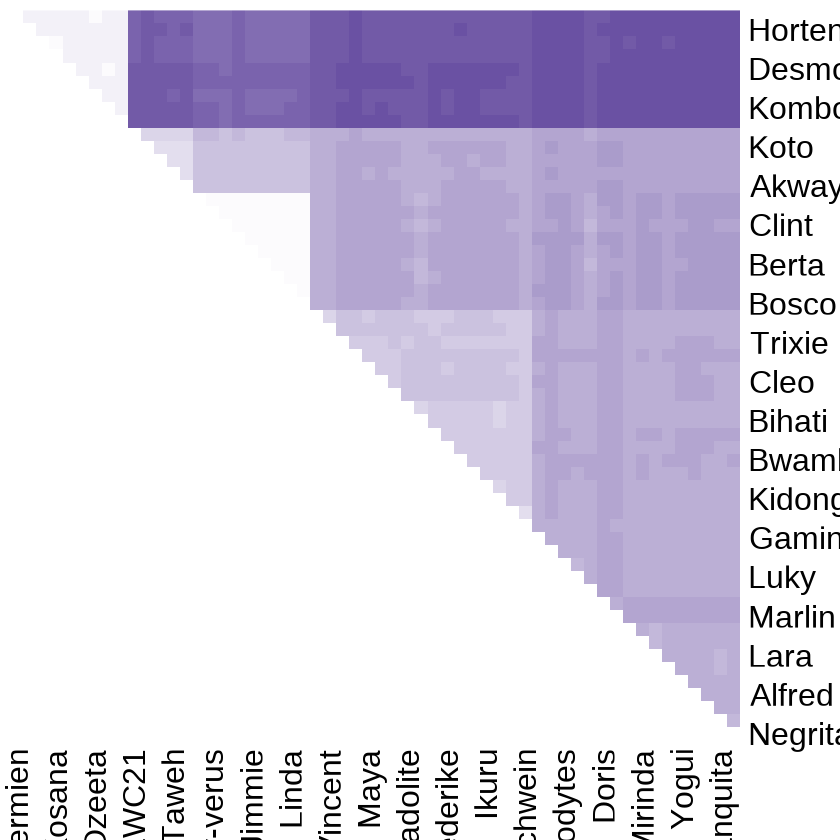

In [57]:
color_breaks = c(seq(0.002,0.013,length=19), seq(784,4264,length=20))
divergence_palette <- colorRampPalette(c('#fcfbfd', '#6a51a3'))(n = 19)
sequence_palette <- colorRampPalette(c('white','white'))(n = 19) # color these out for a half matrix
col_palette <- c(sequence_palette,divergence_palette)
heatmap(x = combined_divergence_sequence_differences_matrix, Rowv = NA, symm=TRUE, col = col_palette, breaks = color_breaks)

In [58]:
pdf('main_fig_components/mean_3d_divergence_heatmap.pdf', height = 15, width = 15)
heatmap(x = combined_divergence_sequence_differences_matrix, Rowv = NA, symm=TRUE, col = col_palette, breaks = color_breaks) # does not save as an object so we just call the command again
dev.off()

png 
  2

## Genome-Wide 3D Divergence Boxplots <a class = 'anchor' id = 'genomewideboxplots'></a>

In [59]:
comparisons_simple = comparisons
comparisons_simple$lineages <- str_replace_all(comparisons_simple$lineages, c('pte-pts'='pt-pt', 'pte-ptt'='pt-pt', 'pte-ptv'='pt-pt', 'pts-ptt'='pt-pt', 'pts-ptv'='pt-pt', 'ptt-ptv'='pt-pt'))
head(comparisons_simple)

,ind1,ind2,lineages,chr,window_start,window,mse,spearman,divergence,seq_diff
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>
1,Akwaya-Jean,Alfred,pt-pt,chr10,1572864,chr10_1572864,0.0001679965,0.9876550,0.012344984,2803
2,Akwaya-Jean,Alfred,pt-pt,chr10,2097152,chr10_2097152,0.0004808925,0.9698092,0.030190797,2715
3,Akwaya-Jean,Alfred,pt-pt,chr10,2621440,chr10_2621440,0.0016745600,0.9963985,0.003601548,2849
4,Akwaya-Jean,Alfred,pt-pt,chr10,3145728,chr10_3145728,0.0003225794,0.9978993,0.002100716,2606
5,Akwaya-Jean,Alfred,pt-pt,chr10,3670016,chr10_3670016,0.0001429828,0.9967316,0.003268396,2594
6,Akwaya-Jean,Alfred,pt-pt,chr10,4194304,chr10_4194304,0.0022898065,0.9975879,0.002412069,2885


In [60]:
nrow(comparisons_simple)

[1] 6669390

In [61]:
aggregate(divergence ~ lineages, data = comparisons_simple, median)

lineages,divergence
<chr>,<dbl>
ppn-ppn,0.0008288782
ppn-ptr,0.0041300803
pt-pt,0.0023307224
pte-pte,0.0012816679
pts-pts,0.0016288776
ptt-ptt,0.0021648987
ptv-ptv,0.0005900994


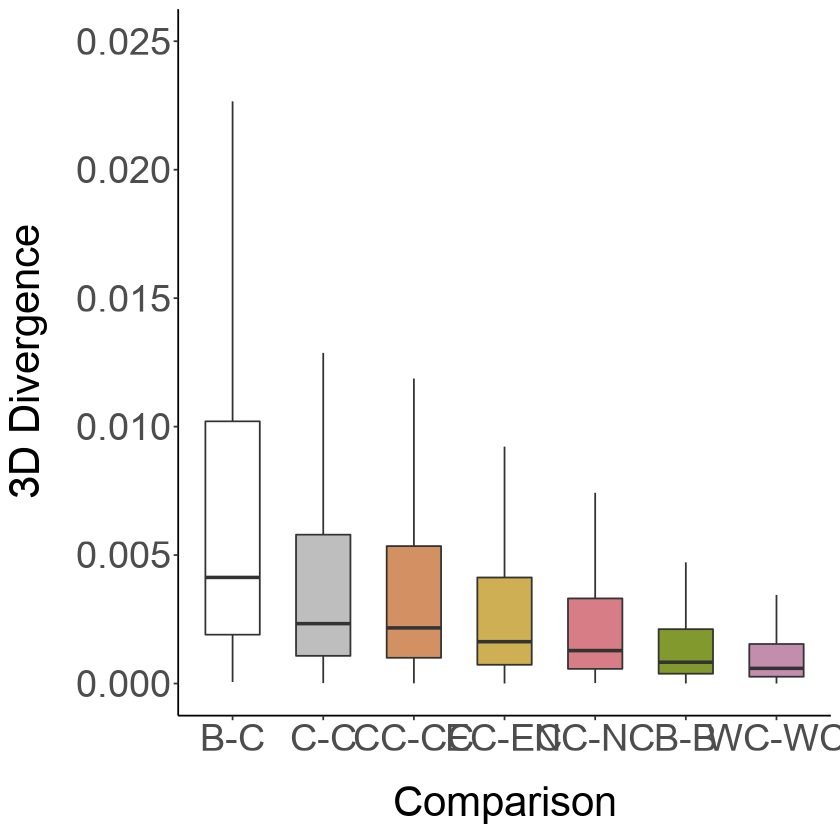

In [62]:
dyad_boxplots_simple <- ggplot(comparisons_simple, aes(x = reorder(lineages, -divergence), y = divergence, fill = lineages), fill = 'transparent') + geom_boxplot(outlier.shape = NA, width = 0.6) +
xlab('\nComparison') + ylab('3D Divergence\n') + 
coord_cartesian(ylim = c(0,0.025)) + theme_classic() + theme(panel.background = element_rect(fill = 'transparent', colour = NA), plot.background = element_rect(fill = 'transparent', colour = NA)) +
theme(text = element_text(family = 'Arial')) +
scale_x_discrete(labels = c('B-C','C-C','CC-CC','EC-EC','NC-NC','B-B','WC-WC')) +
scale_fill_manual(values = c(ppn_color, 'white', 'grey', pte_color, pts_color, ptt_color, ptv_color)) +
theme(axis.title = element_text(size = 10), axis.text.x = element_text(size = 9), axis.text.y = element_text(size = 9)) +
theme(legend.position = 'none') 

dyad_boxplots_simple

In [63]:
pdf('main_fig_components/dyad_boxplots.pdf', height = 6, width = 6, bg = 'transparent')
dyad_boxplots_simple
dev.off()

png 
  2

## Window Maxima by Topology <a class = 'anchor' id = 'topologywindowmaxima'></a>

In [64]:
SDI_window_maxes = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/window_topologies/SDI_window_maxes.txt', sep = '\t', header = FALSE)
colnames(SDI_window_maxes) <- c('max')
SDI_window_maxes$topology <- 'Single Divergent Individual'
head(SDI_window_maxes)

,max,topology
,<dbl>,<chr>
1,0.10149728,Single Divergent Individual
2,0.03186678,Single Divergent Individual
3,0.08244390,Single Divergent Individual
4,0.05694467,Single Divergent Individual
5,0.34032597,Single Divergent Individual
6,0.02561057,Single Divergent Individual


In [65]:
MDI_window_maxes = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/window_topologies/MDI_window_maxes.txt', sep = '\t', header = FALSE)
colnames(MDI_window_maxes) <- c('max')
MDI_window_maxes$topology <- 'Multiple Divergent Individuals'
head(MDI_window_maxes)

,max,topology
,<dbl>,<chr>
1,0.128958970,Multiple Divergent Individuals
2,0.033607688,Multiple Divergent Individuals
3,0.138848248,Multiple Divergent Individuals
4,0.195121205,Multiple Divergent Individuals
5,0.269118805,Multiple Divergent Individuals
6,0.007094442,Multiple Divergent Individuals


In [66]:
ppn_ptr_window_maxes = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/window_topologies/ppn_ptr_window_maxes.txt', sep = '\t', header = FALSE)
colnames(ppn_ptr_window_maxes) <- c('max')
ppn_ptr_window_maxes$topology <- 'Bonobo-Chimpanzee'
head(ppn_ptr_window_maxes)

,max,topology
,<dbl>,<chr>
1,0.104309941,Bonobo-Chimpanzee
2,0.038955542,Bonobo-Chimpanzee
3,0.044651476,Bonobo-Chimpanzee
4,0.009204693,Bonobo-Chimpanzee
5,0.055726102,Bonobo-Chimpanzee
6,0.004317256,Bonobo-Chimpanzee


In [67]:
topology_maxes <- rbind(SDI_window_maxes, MDI_window_maxes, ppn_ptr_window_maxes)
topology_maxes$topology <- factor(topology_maxes$topology, levels = c('Single Divergent Individual', 'Multiple Divergent Individuals', 'Bonobo-Chimpanzee'))
head(topology_maxes)

,max,topology
,<dbl>,<fct>
1,0.10149728,Single Divergent Individual
2,0.03186678,Single Divergent Individual
3,0.08244390,Single Divergent Individual
4,0.05694467,Single Divergent Individual
5,0.34032597,Single Divergent Individual
6,0.02561057,Single Divergent Individual


In [68]:
topology_maxes_significance_label <- bquote('Kruskal-Wallis, H = 31.1, P = 1.77 x 10'^'-7')

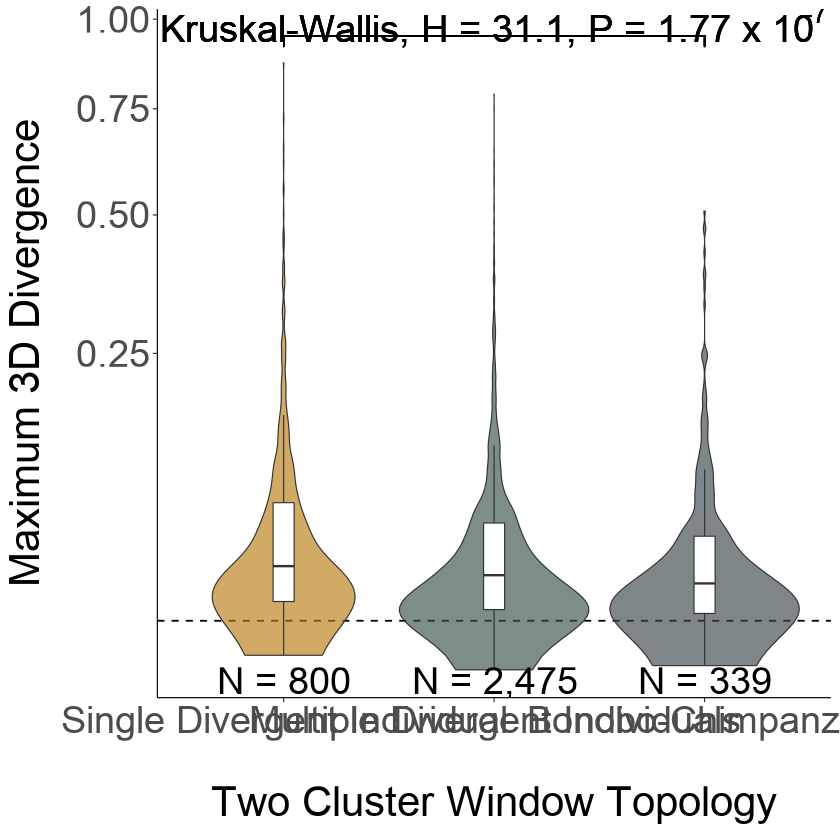

In [69]:
topology_maxes_plot <- ggplot(topology_maxes, aes(x = topology, y = max, fill = topology)) + geom_hline(yintercept = 0.01, linetype = 'dashed') +
geom_violin(size = (0.125/0.377), alpha = 0.65) + geom_boxplot(width = 0.1, size = (0.125/0.377), fill = 'white', outlier.shape = NA) + 
geom_segment(aes(x = 'Single Divergent Individual', y = 0.92, xend = 'Single Divergent Individual', yend = 0.95), size = (0.125/0.377), lineend = 'round') +
geom_segment(aes(x = 'Single Divergent Individual', y = 0.95, xend = 'Bonobo-Chimpanzee', yend = 0.95), size = (0.125/0.377), lineend = 'round') +
geom_segment(aes(x = 'Bonobo-Chimpanzee', y = 0.92, xend = 'Bonobo-Chimpanzee', yend = 0.95), size = (0.125/0.377), lineend = 'round') +
annotate('text', x = 'Multiple Divergent Individuals', y = 0.98, label = topology_maxes_significance_label, family = 'Arial', size = 9/.pt, hjust = 0.5) +
annotate('text', x = 'Single Divergent Individual', y = 0.0001, label = 'N = 800', family = 'Arial', size = 9/.pt, hjust = 0.5) +
annotate('text', x = 'Multiple Divergent Individuals', y = 0.0001, label = 'N = 2,475', family = 'Arial', size = 9/.pt, hjust = 0.5) +
annotate('text', x = 'Bonobo-Chimpanzee', y = 0.0001, label = 'N = 339', family = 'Arial', size = 9/.pt, hjust = 0.5) +
scale_fill_manual(values = c('#b87e13','#36514c','#3b464a')) + coord_trans(y = 'sqrt') + scale_y_continuous(limits = c(0,1), expand = c(0.0075,0.0075)) +
xlab('\n\nTwo Cluster Window Topology') + ylab('Maximum 3D Divergence\n') + fig_theme

topology_maxes_plot

In [70]:
pdf('suppl_figs/topology_maxes_plot.pdf', height = 8, width = 8)
topology_maxes_plot
dev.off()

png 
  2

## Multiple Divergent Individuals Clustering Windows <a class = 'anchor' id = 'mdis'></a>

In [71]:
MDI_windows_small_cluster_counts_summary = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/window_topologies/MDI_windows_small_cluster_counts_summary.txt', sep = '\t', header = TRUE)
MDI_windows_small_cluster_counts_summary$topology = 'MDI'
head(MDI_windows_small_cluster_counts_summary)

,small_cluster_N,N,topology
,<int>,<int>,<chr>
1,2,436,MDI
2,3,264,MDI
3,4,166,MDI
4,5,154,MDI
5,6,122,MDI
6,7,98,MDI


Let's add a bar for the SDIs, per a reviewer suggestion.

In [72]:
SDI_cluster_size <- c(1)
SDI_N <- c(800)
SDI_topology_label <- c('SDI')
SDI_addition <- data.frame(SDI_cluster_size,SDI_N,SDI_topology_label)
colnames(SDI_addition) <- c('small_cluster_N','N','topology')
head(SDI_addition)

,small_cluster_N,N,topology
,<dbl>,<dbl>,<chr>
1,1,800,SDI


In [73]:
MDI_windows_small_cluster_counts_summary <- rbind(SDI_addition, MDI_windows_small_cluster_counts_summary)
head(MDI_windows_small_cluster_counts_summary)

,small_cluster_N,N,topology
,<dbl>,<dbl>,<chr>
1,1,800,SDI
2,2,436,MDI
3,3,264,MDI
4,4,166,MDI
5,5,154,MDI
6,6,122,MDI


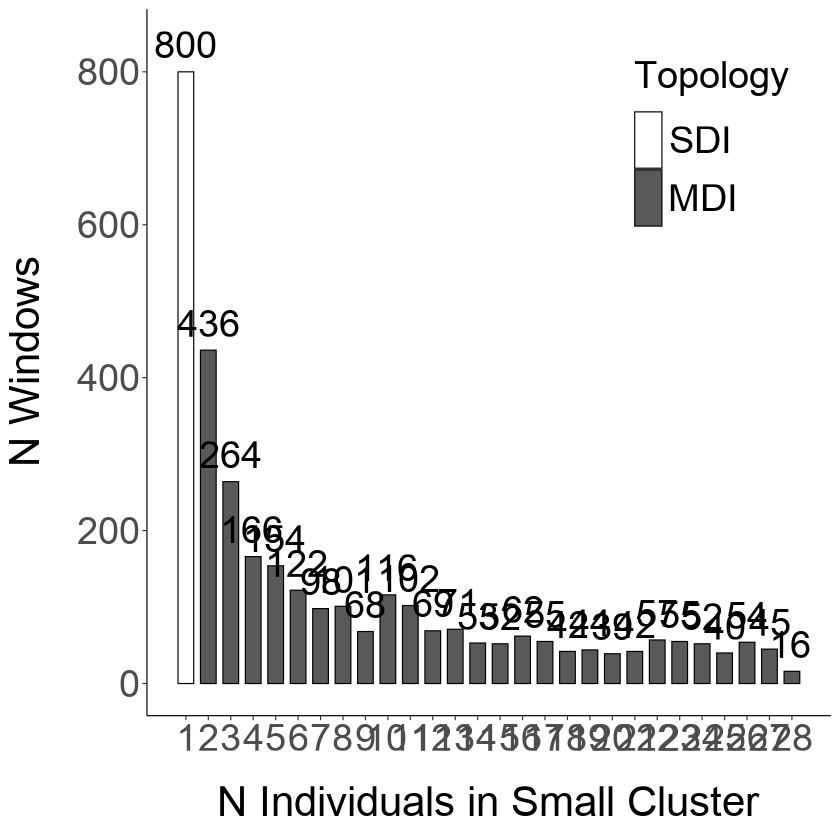

In [74]:
MDI_windows_small_cluster_counts_summary_plot <- ggplot(MDI_windows_small_cluster_counts_summary, aes(x = small_cluster_N, y = N, fill = topology)) + 
geom_bar(stat = 'identity', width = 0.7, color = 'black', size = (0.125/0.377)) + geom_text(aes(label = N), vjust = -0.5, family = 'Arial', size = 9/.pt) +
scale_x_continuous(breaks = seq(min(MDI_windows_small_cluster_counts_summary$small_cluster_N), max(MDI_windows_small_cluster_counts_summary$small_cluster_N), by = 1)) + 
scale_fill_manual(name = 'Topology', values = c('SDI' = 'white', 'MDI' = '#595959')) + 
coord_cartesian(ylim = c(0, 840)) + xlab('\nN Individuals in Small Cluster') + ylab('N Windows\n') + 
theme_classic() + theme(axis.line.x.bottom = element_line(size = (0.125/0.377)), axis.line.y.left = element_line(size = (0.125/0.377)),
axis.title = element_text(size = 10), axis.text.x = element_text(size = 9), axis.text.y = element_text(size = 9),
axis.ticks = element_line(size = (0.125/0.377)), legend.background = element_rect(fill = 'white', color = NA),
legend.position = c(0.9, 0.82), legend.text = element_text(size = 9), legend.title = element_text(size = 9), text = element_text(family = 'Arial'))

MDI_windows_small_cluster_counts_summary_plot

In [75]:
MDI_windows_small_cluster_composition = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/window_topologies/MDI_windows_small_cluster_composition.txt', sep = '\t', header = TRUE)
colnames(MDI_windows_small_cluster_composition) <- c('Bonobo','Nigeria-Cameroon Chimpanzee','Eastern Chimpanzee','Central Chimpanzee','Western Chimpanzee')
head(MDI_windows_small_cluster_composition)

,Bonobo,Nigeria-Cameroon Chimpanzee,Eastern Chimpanzee,Central Chimpanzee,Western Chimpanzee
,<chr>,<chr>,<chr>,<chr>,<chr>
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,True
4,True,True,True,True,False
5,True,False,False,False,False
6,True,False,False,False,False


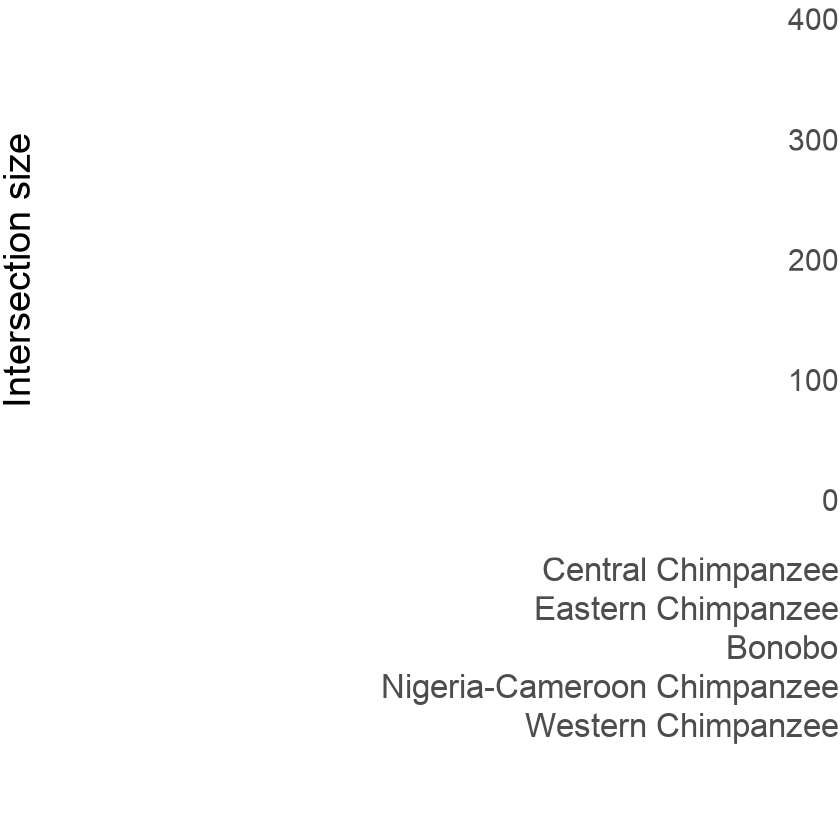

In [76]:
MDI_windows_small_cluster_composition_upset_plot <- upset(data = MDI_windows_small_cluster_composition, intersect = colnames(MDI_windows_small_cluster_composition), sort_sets = 'descending',
                      name = '', 
                      min_size = 0,
                      height_ratio = 0.4,
                      width_ratio = 0.25,
                      set_sizes = FALSE,
                      matrix = (intersection_matrix(geom = geom_point(size = 3))),
                      base_annotations = list('Intersection size' = intersection_size(text = list(family = 'Arial', size = 2.3))), # The size argument does not appear to respond to the ggplot .pt constant hence the different size here.
                      themes = upset_modify_themes(list('Intersection size' = theme(text = element_text(family = 'Arial', size = 9)),  
                                                        'intersections_matrix' = theme(text = element_text(family = 'Arial', size = 10)))))

MDI_windows_small_cluster_composition_upset_plot

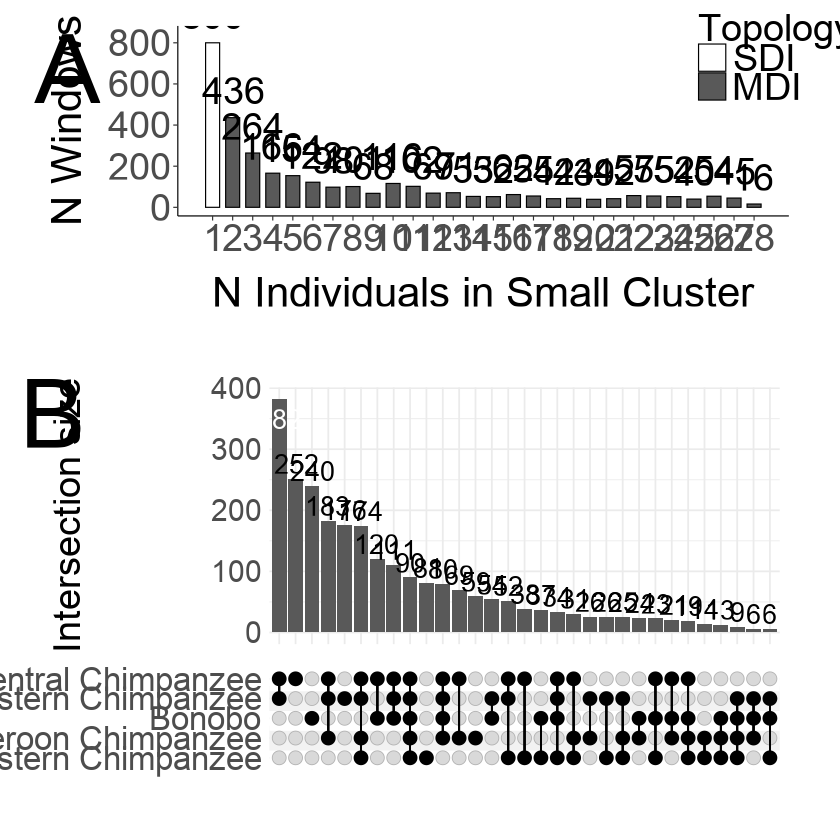

In [77]:
column <- plot_grid(MDI_windows_small_cluster_counts_summary_plot, NULL, MDI_windows_small_cluster_composition_upset_plot, labels = c('A','','B'), label_size = 24, label_fontface = 'plain', rel_heights = c(0.4,0.01,0.59), ncol = 1, scale = 0.9)
column

In [78]:
pdf('suppl_figs/MDIs_plot.pdf', width = 10, height = 10)
column
dev.off()

png 
  2

## Single Divergent Individual Clustering Windows <a class = 'anchor' id = 'sdis'></a>

In [79]:
SDI_stats_per_individual = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/window_topologies/SDI_stats_per_ind.txt', sep = '\t', header = TRUE)
head(SDI_stats_per_individual)

,SDI_ind,lineage,N,min,mean,max
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,Akwaya-Jean,pte,16,0.011237478,0.04947819,0.2043796
2,Alfred,ptt,21,0.004539219,0.05570643,0.2012468
3,Alice,ptv,9,0.008468631,0.11871172,0.5025254
4,Andromeda,pts,12,0.013257149,0.05090488,0.1076266
5,Athanga,pts,13,0.006030998,0.12600212,0.4630064
6,Berta,ptv,6,0.007774569,0.32248823,0.8736046


In [80]:
n_SDIs_seq <- seq(1,34,1)
n_SDIs <- data.frame(n_SDIs_seq)
colnames(n_SDIs) <- c('N')
n_SDIs$prop <- sapply(n_SDIs$N, function(x) {sum(SDI_stats_per_individual$N >= x)/56})
head(n_SDIs)

,N,prop
,<dbl>,<dbl>
1,1,1.0000000
2,2,0.9821429
3,3,0.9821429
4,4,0.9642857
5,5,0.9642857
6,6,0.9642857


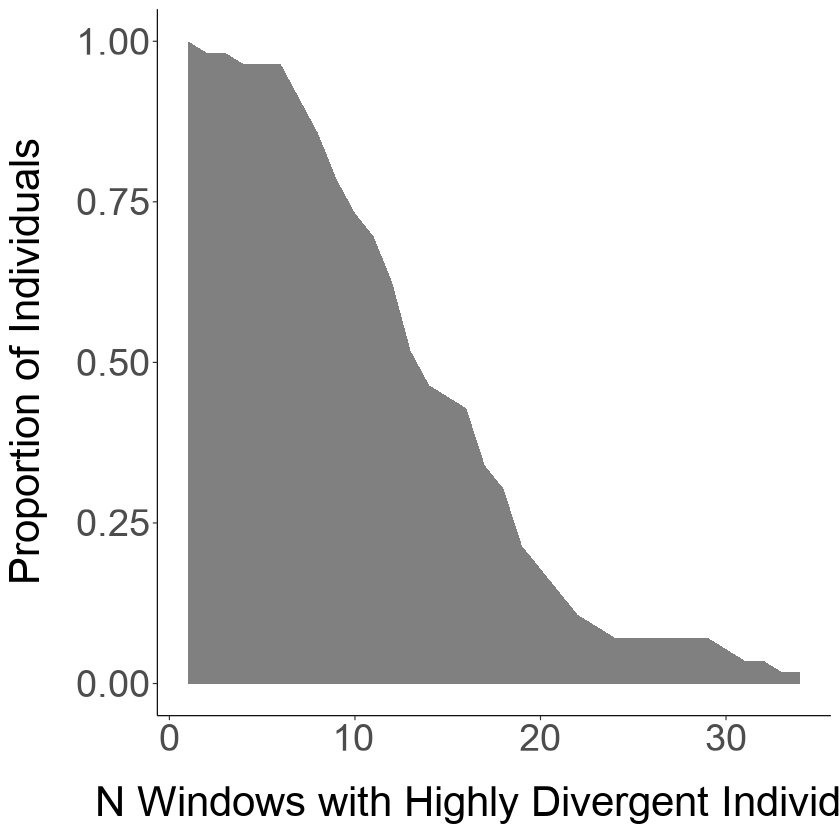

In [81]:
n_SDIs_plot <- ggplot(n_SDIs, aes(x = N, y = prop)) + geom_ribbon(aes(ymin = 0, ymax = prop), fill = '#808080') +
xlab('\nN Windows with Highly Divergent Individual') + ylab('Proportion of Individuals\n') +
fig_theme

n_SDIs_plot

In [82]:
replacements <- c('Cindy-schwein' = 'Cindy (EC)', 'Cindy-troglodytes' = 'Cindy (CC)', 'Cindy-verus' = 'Cindy (WC)', 'Coco-chimp' = 'Coco', 'Julie-A959' = 'Julie (CC)', 'Julie-LWC21' = 'Julie (NC)')
SDI_stats_per_individual$SDI_ind <- str_replace_all(SDI_stats_per_individual$SDI_ind, replacements)

In [83]:
reordered_Ns <- SDI_stats_per_individual[order(SDI_stats_per_individual$mean), ]

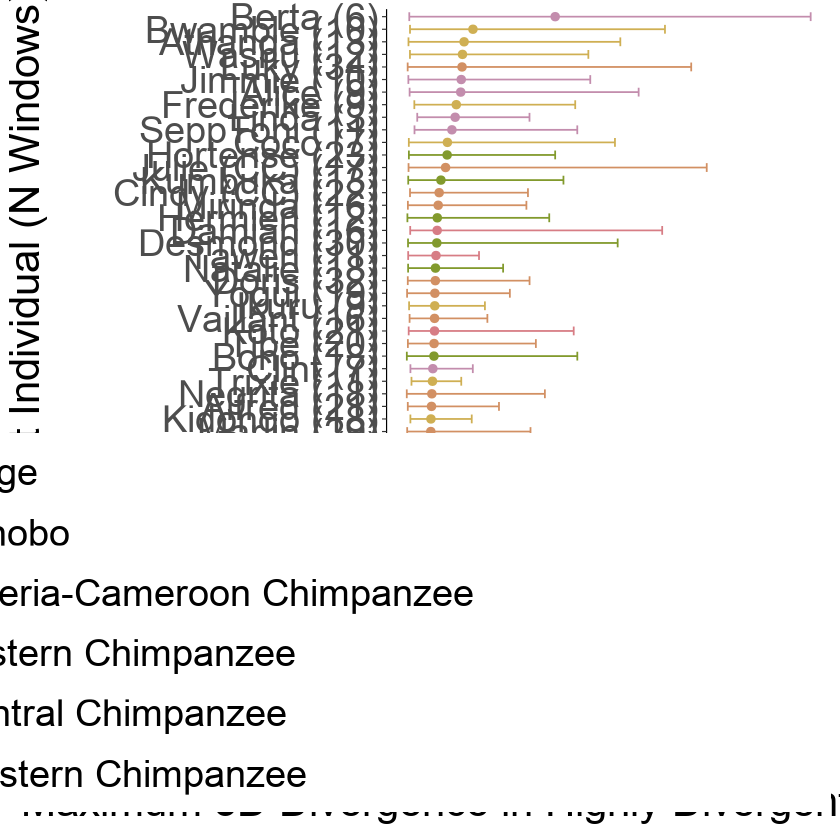

In [84]:
SDI_stats_per_individual_plot <- ggplot(SDI_stats_per_individual, aes(y = reorder(SDI_ind, mean))) + geom_point(aes(x = mean, color = lineage), size = 2) +
geom_errorbarh(data = SDI_stats_per_individual, aes(xmin = min, xmax = max, color = lineage), height = 0.7, size = 0.5, show.legend = FALSE) +
scale_color_manual(labels = c('Bonobo', 'Nigeria-Cameroon Chimpanzee', 'Eastern Chimpanzee', 'Central Chimpanzee', 'Western Chimpanzee'), name = 'Lineage', values = c(ppn_color, pte_color, pts_color, ptt_color, ptv_color)) +
scale_y_discrete(labels = function(y) paste(y, ' (', reordered_Ns$N, ')', sep = '')) +
xlab('\nMaximum 3D Divergence in Highly Divergent Individual Window') + ylab('Highly Divergent Individual (N Windows)\n') +
fig_theme +
#geom_rect(aes(xmin = 0.515, xmax = 0.985, ymin = 'Nakuu', ymax = 'Ula'), color = 'black', size = (0.125/0.377), fill = 'white') +
theme(legend.position = c(1, 0.4), legend.justification = c('right', 'top'), legend.box.just = 'right', legend.margin = margin(6, 6, 6, 6)) +
theme(legend.title = element_text(size = 9), legend.text = element_text(size = 9)) +
theme(legend.spacing.y = unit(0.05, 'cm')) + guides(color = guide_legend(byrow = TRUE))

SDI_stats_per_individual_plot

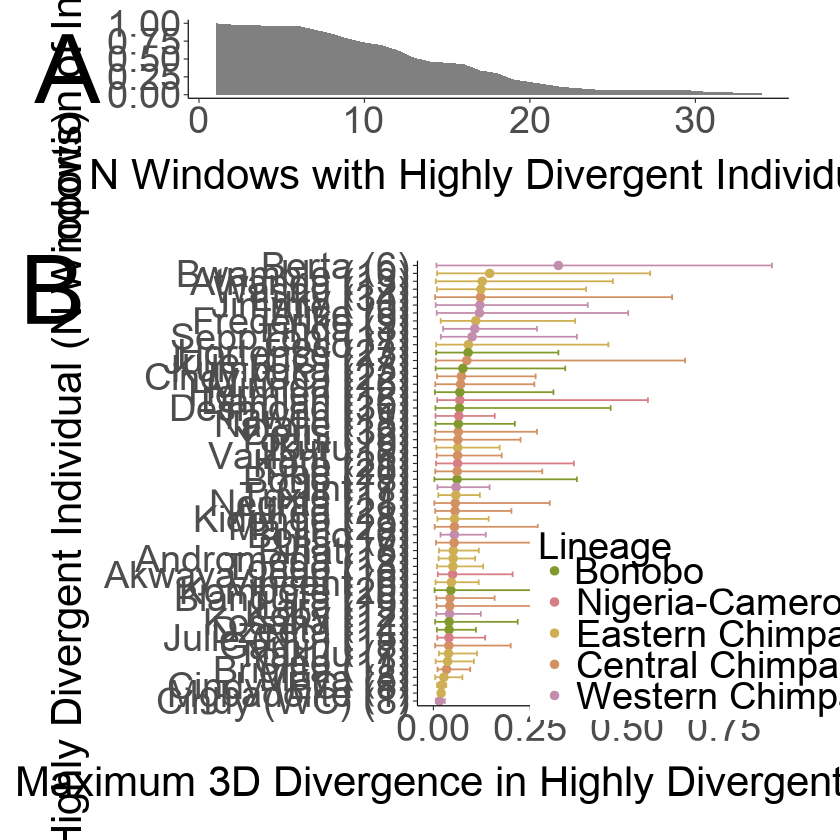

In [85]:
column <- plot_grid(n_SDIs_plot, NULL, SDI_stats_per_individual_plot, labels = c('A','','B'), label_size = 24, label_fontface = 'plain', rel_heights = c(0.25,0.01,0.73), ncol = 1, scale = 0.9)
column

In [86]:
pdf('suppl_figs/SDIs_plot.pdf', width = 10, height = 12.5)
column
dev.off()

png 
  2

## Interspecific Divergence Distribution in Bonobo-Chimpanzee Divergent Windows <a class = 'anchor' id = 'interspecificdivergencedistribution'></a>

In [87]:
ppn_ptr_window_stats = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/ppn_ptr_windows/ppn_ptr_window_stats.txt', sep = '\t', header = TRUE)
head(ppn_ptr_window_stats)

,window,minimum,mean,maximum,variance
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr10_3670016,0.0087489643,0.029607729,0.096247971,0.0002549324785
2,chr10_4194304,0.0013341943,0.003768624,0.012365070,0.0000035525717
3,chr10_23592960,0.0032720074,0.019802302,0.055726102,0.0000908229293
4,chr10_28311552,0.0003165433,0.001305830,0.004317256,0.0000004994337
5,chr10_30932992,0.0037385639,0.011763926,0.024301077,0.0000139839609
6,chr10_35651584,0.0080754911,0.024794265,0.058998582,0.0000594466336


In [88]:
ppn_ptr_window_stats_minima_sorted <- ppn_ptr_window_stats[order(ppn_ptr_window_stats$minimum), ]
ppn_ptr_window_stats_minima_sorted$row <- seq_along(ppn_ptr_window_stats$window)
head(ppn_ptr_window_stats_minima_sorted)

,window,minimum,mean,maximum,variance,row
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
7,chr10_58720256,0.0001286198,0.0003937672,0.001082596,0.00000002918929,1
242,chr5_145752064,0.0002330151,0.0012377344,0.003285892,0.00000029128753,2
59,chr13_66584576,0.0002436167,0.0008856689,0.002343231,0.00000014612783,3
218,chr4_96993280,0.0002833568,0.0020338760,0.006314628,0.00000112845139,4
4,chr10_28311552,0.0003165433,0.0013058296,0.004317256,0.00000049943369,5
330,chrX_105906176,0.0003771947,0.0008972239,0.001726603,0.00000007739659,6


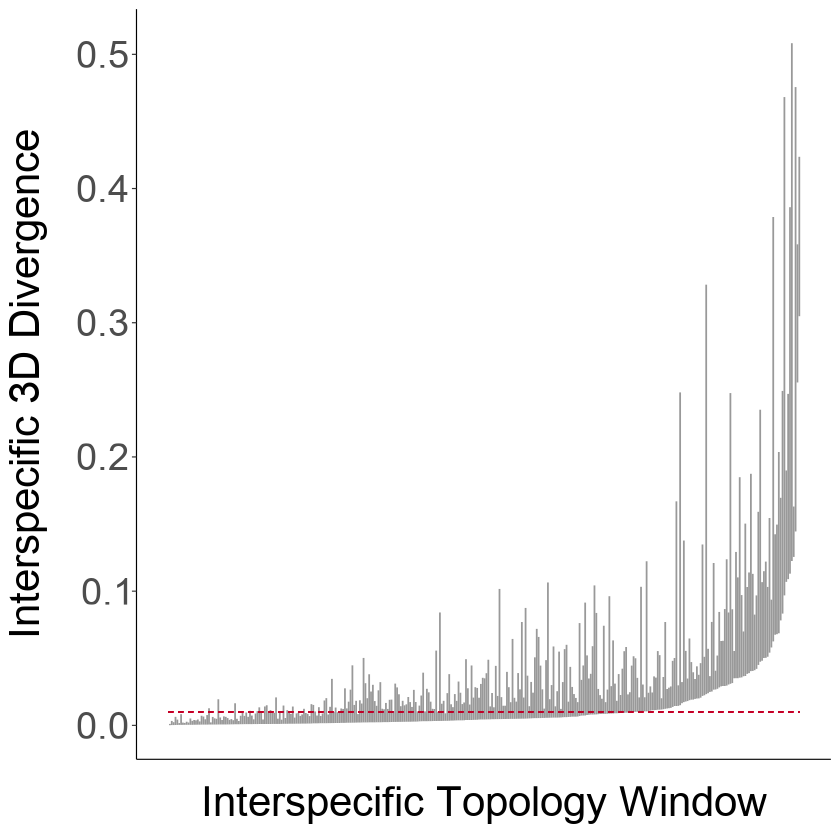

In [89]:
interspecific_topology_divergence_ranges <- ggplot(ppn_ptr_window_stats_minima_sorted, aes(x = row)) + geom_linerange(aes(ymin = minimum, ymax = maximum), width = 0.4, color = 'gray60') +
geom_segment(aes(x = 0, y = 0.01, xend = 339, yend = 0.01), size = (0.1/0.377), linetype = 'dashed', color = '#c30026') +
xlab('\nInterspecific Topology Window') + ylab('Interspecific 3D Divergence\n') + fig_theme + 
theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())

interspecific_topology_divergence_ranges

In [90]:
pdf('suppl_figs/interspecific_topology_divergence_ranges.pdf', width = 10, height = 6)
interspecific_topology_divergence_ranges
dev.off()

png 
  2

## *MYO10* Kidney Expression <a class = 'anchor' id = 'myo10kidneyexpression'></a>

In [91]:
x <- c('x','x','x','x')
species <- c('B','B','C','C')
counts <- c(1914,1382,2184,3619)
MYO10_gene_expression <- data.frame(x,species,counts)
head(MYO10_gene_expression)

,x,species,counts
,<chr>,<chr>,<dbl>
1,x,B,1914
2,x,B,1382
3,x,C,2184
4,x,C,3619


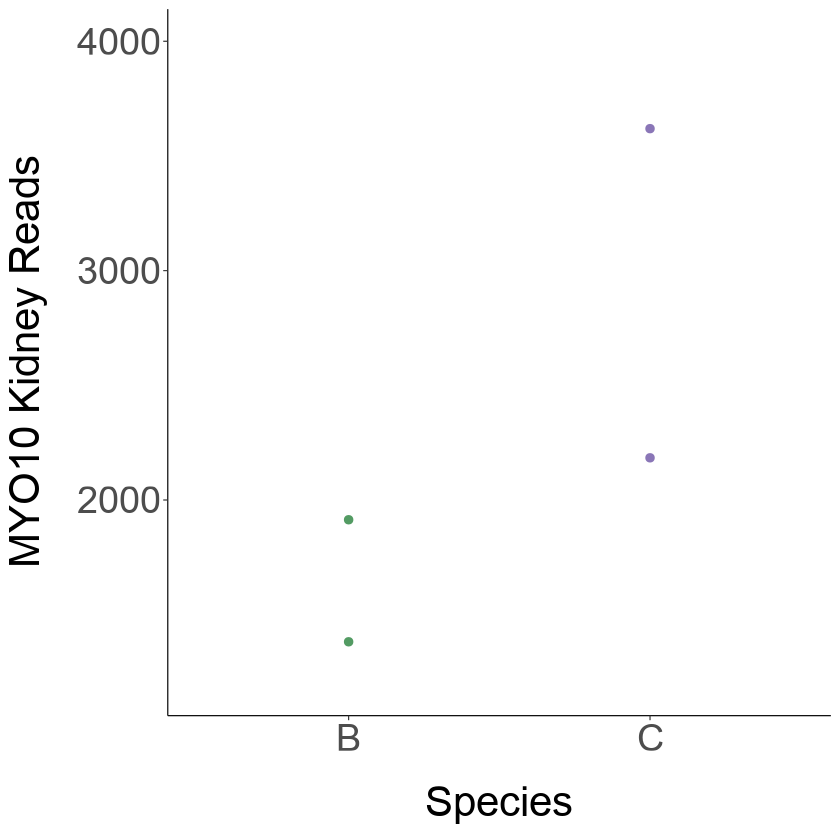

In [92]:
MYO10_gene_expression_plot <- ggplot(MYO10_gene_expression, aes(x = species, y = counts, color = species)) +
geom_point(size = 2) + scale_y_continuous(breaks = c(2000,3000,4000), limits = c(1200,4000)) +
xlab('\nSpecies') + ylab('MYO10 Kidney Reads\n') + scale_color_manual(values = c('#539b63', '#8a76b7')) + 
fig_theme

MYO10_gene_expression_plot

In [93]:
pdf('main_fig_components/MYO10_gene_expression_plot.pdf', width = 1.5, height = 2)
MYO10_gene_expression_plot
dev.off()

png 
  2

## Gene Expression at First Example Bonobo-Chimpanzee Divergent Window <a class = 'anchor' id = 'firstexampleexpression'></a>

Write a function for plotting expression data per gene.

In [94]:
gene_expression_plot <- function(dataframe, gene) {
    ggplot(dataframe, aes(x = tissue, y = counts, color = species)) + 
    geom_point(position = position_dodge(width = 0.7), size = 3) + facet_wrap(~ tissue, scales = 'free_x', ncol = 4) +
    xlab('\nTissue') + ylab('Read Counts\n') + ggtitle(paste0(gene,'\n')) +
    scale_color_manual(values = c('#f98125', '#3c74c8')) + theme_classic() +
    theme(text = element_text(family = 'Arial'), axis.line.x.bottom = element_blank(),  axis.line.y.left = element_blank(), axis.title = element_text(size = 10),
        axis.text.x = element_text(size = 9), axis.text.y = element_text(size = 9),
        panel.border=element_rect(colour='black', fill = NA, size = (0.125/0.377)), axis.ticks = element_line(size = (0.125/0.377)),
        legend.position = 'none', plot.title = element_text(size = 10, face = 'italic', family = 'sans', hjust = 0.5), strip.text = element_blank())
}

In [95]:
species <- c('Bonobo','Bonobo','Bonobo','Bonobo','Bonobo','Bonobo','Bonobo','Bonobo',
             'Chimpanzee','Chimpanzee','Chimpanzee','Chimpanzee','Chimpanzee','Chimpanzee','Chimpanzee','Chimpanzee')
tissue <- c('Cerebellum','Cerebellum','Heart','Heart','Kidney','Kidney','Liver','Liver',
            'Cerebellum','Cerebellum','Heart','Heart','Kidney','Kidney','Liver','Liver')
counts <- c(474,715,613,316,352,335,511,238,
            1042,486,859,544,764,587,1091,328)
ZNF622_expression <- data.frame(species,tissue,counts)

Run the code above and some additional code to grab the legend for the multiplot.

In [96]:
expression_plot_legend <- gene_expression_plot(ZNF622_expression, 'ZNF622') + theme(legend.position = 'bottom', legend.text = element_text(margin = margin(r = 30, unit = 'pt')), legend.title = element_blank())
expression_plot_legend <- get_legend(expression_plot_legend)

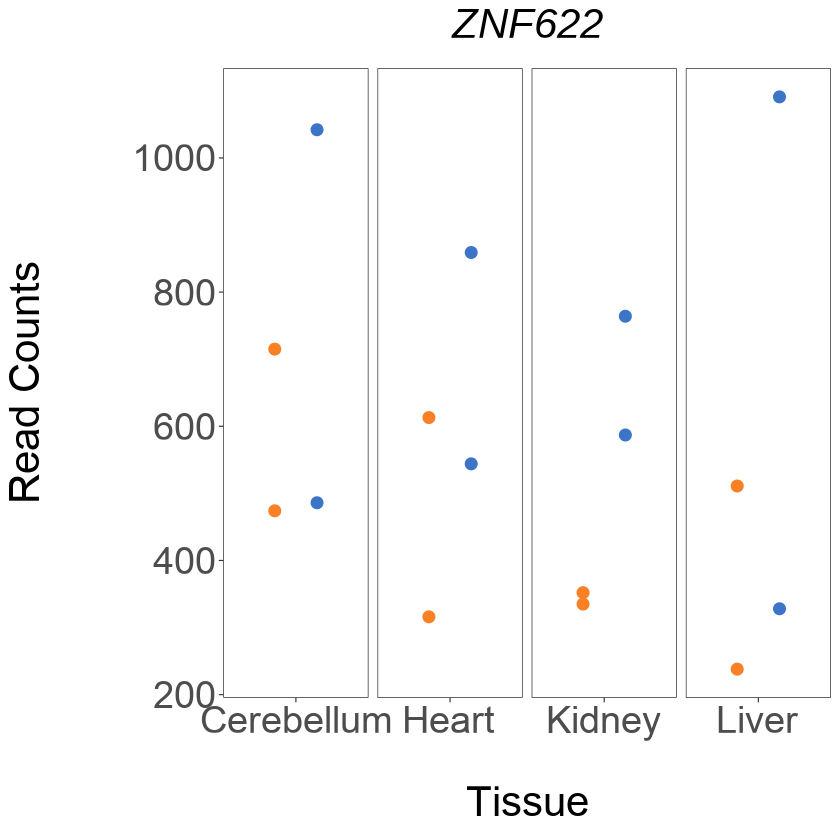

In [97]:
ZNF622_expression_plot <- gene_expression_plot(ZNF622_expression, 'ZNF622')
ZNF622_expression_plot

In [98]:
species <- c('ppn','ppn','ppn','ppn','ppn','ppn','ppn','ppn',
             'ptr','ptr','ptr','ptr','ptr','ptr','ptr','ptr')
tissue <- c('Cerebellum','Cerebellum','Heart','Heart','Kidney','Kidney','Liver','Liver',
            'Cerebellum','Cerebellum','Heart','Heart','Kidney','Kidney','Liver','Liver')
counts <- c(499,626,2892,700,652,461,4637,496,
            707,462,1826,3262,1515,990,1066,505)
RETREG1_expression <- data.frame(species,tissue,counts)

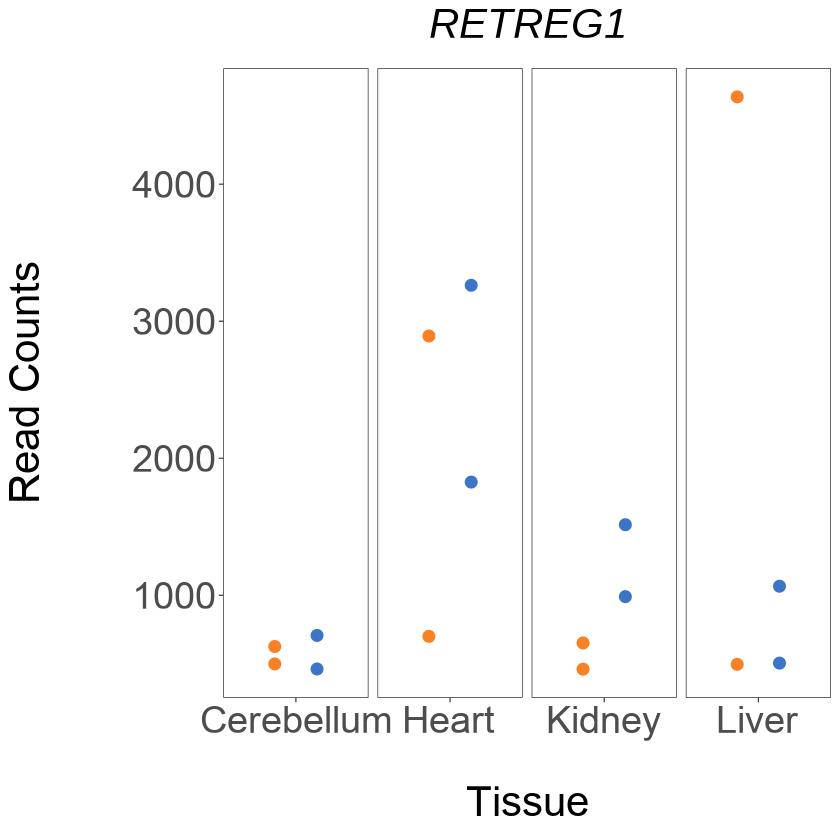

In [99]:
RETREG1_expression_plot <- gene_expression_plot(RETREG1_expression, 'RETREG1')
RETREG1_expression_plot

In [100]:
species <- c('ppn','ppn','ppn','ppn','ppn','ppn','ppn','ppn',
             'ptr','ptr','ptr','ptr','ptr','ptr','ptr','ptr')
tissue <- c('Cerebellum','Cerebellum','Heart','Heart','Kidney','Kidney','Liver','Liver',
            'Cerebellum','Cerebellum','Heart','Heart','Kidney','Kidney','Liver','Liver')
counts <- c(609,833,357,495,1914,1383,288,427,
            854,603,386,882,2184,3619,264,538)
MYO10_expression <- data.frame(species,tissue,counts)

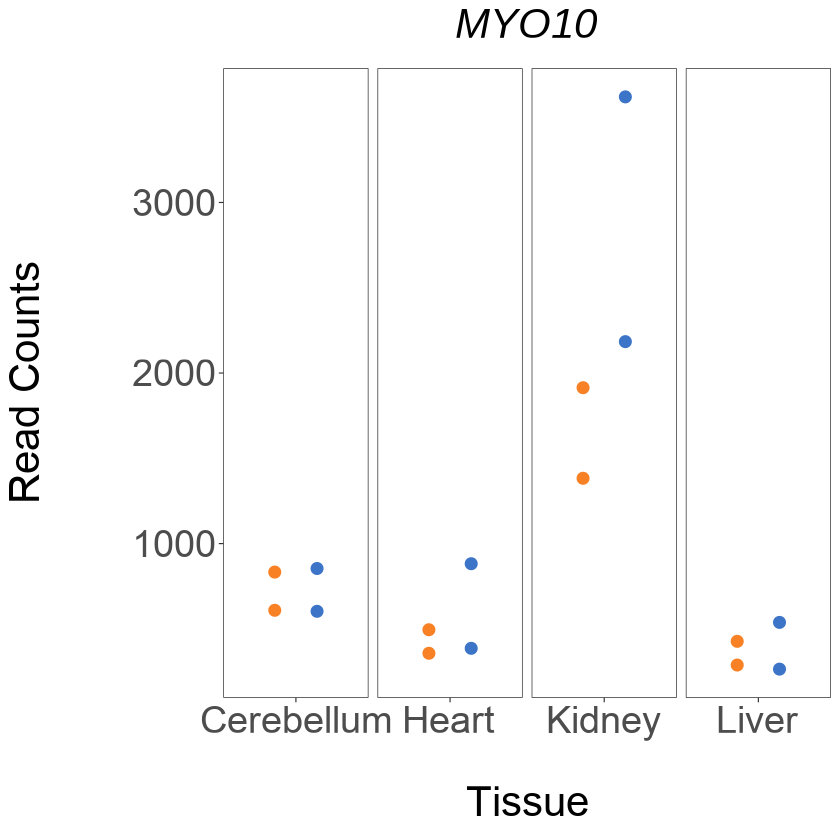

In [101]:
MYO10_expression_plot <- gene_expression_plot(MYO10_expression, 'MYO10')
MYO10_expression_plot

In [102]:
species <- c('ppn','ppn','ppn','ppn','ppn','ppn','ppn','ppn',
             'ptr','ptr','ptr','ptr','ptr','ptr','ptr','ptr')
tissue <- c('Cerebellum','Cerebellum','Heart','Heart','Kidney','Kidney','Liver','Liver',
            'Cerebellum','Cerebellum','Heart','Heart','Kidney','Kidney','Liver','Liver')
counts <- c(3102,2160,114,62,210,156,489,92,
           1754,1972,174,28,213,189,903,94)
BASP1_expression <- data.frame(species,tissue,counts)

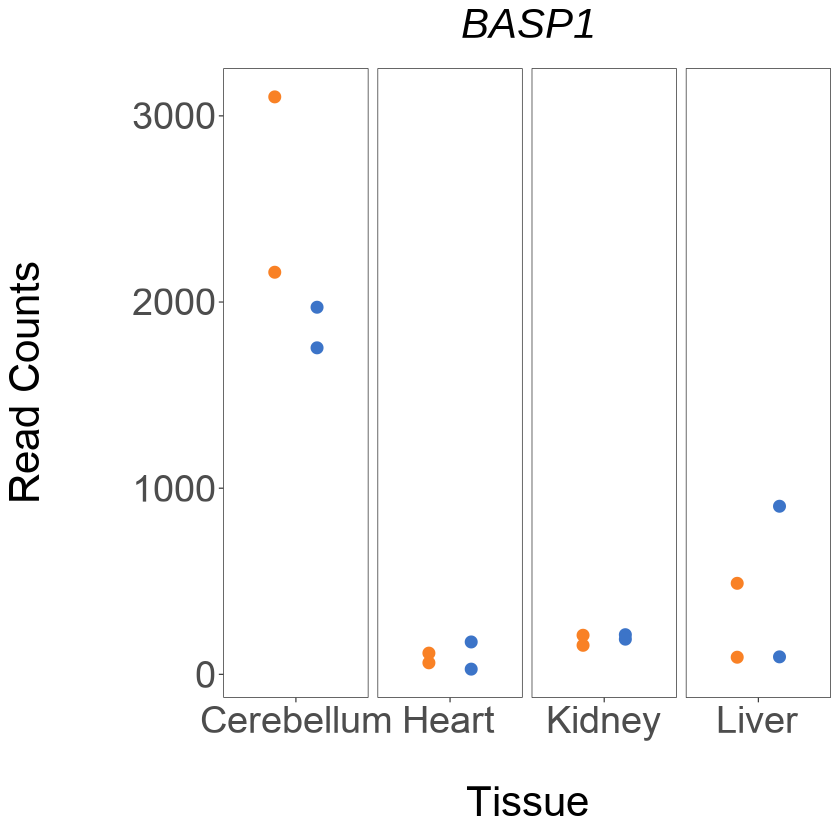

In [103]:
BASP1_expression_plot <- gene_expression_plot(BASP1_expression, 'BASP1')
BASP1_expression_plot

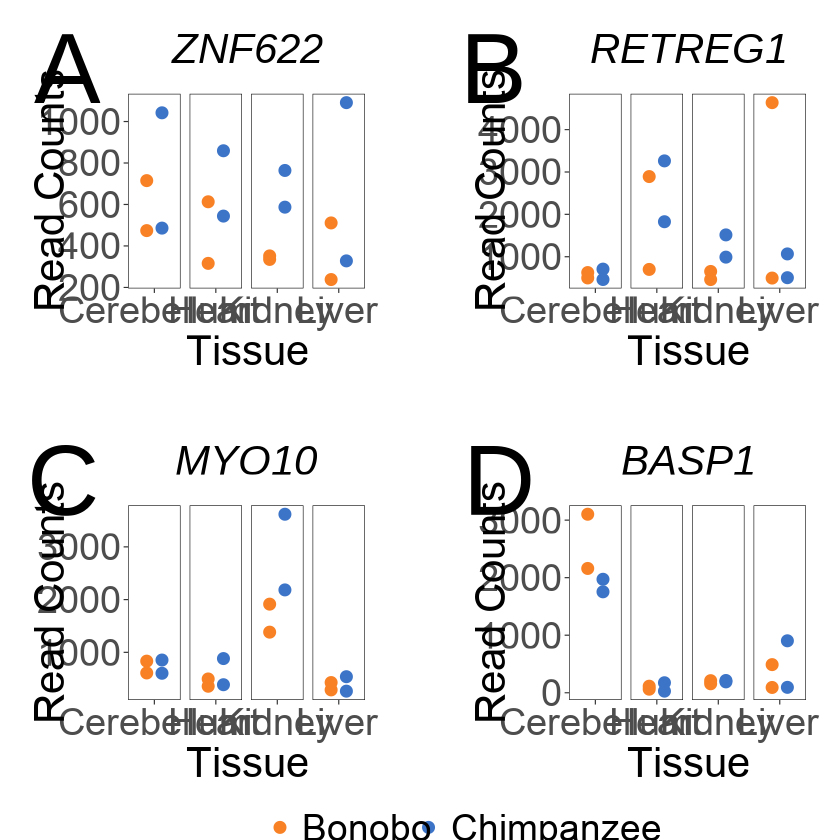

In [104]:
top_row <- plot_grid(ZNF622_expression_plot, NULL, RETREG1_expression_plot, labels = c('A','','B'), label_size = 24, label_fontface = 'plain', nrow = 1, rel_widths = c(0.475,0.05,0.475), scale = 0.875)
null_row <- plot_grid(NULL)
middle_row <- plot_grid(MYO10_expression_plot, NULL, BASP1_expression_plot, labels = c('C','','D'), label_size = 24, label_fontface = 'plain', nrow = 1, rel_widths = c(0.475,0.05,0.475), scale = 0.875)
bottom_row <- plot_grid(expression_plot_legend)
plot <- plot_grid(top_row, null_row, middle_row, bottom_row, ncol = 1, rel_heights = c(0.48,0.01,0.48,0.03))
plot

In [105]:
pdf('suppl_figs/first_example_bonobo_chimpanzee_divergent_window_expression_plot.pdf', width = 10, height = 10)
plot
dev.off()

png 
  2

## Bonobo-Chimpanzee Divergent Windows Main Figure <a class = 'anchor' id = 'ppnptrdivergentwindowsmain'></a>

In [106]:
ppn_pt_window_stats = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/ppn_ptr_windows/ppn_ptr_window_stats.txt', sep = '\t', header = TRUE)
head(ppn_pt_window_stats)

,window,minimum,mean,maximum,variance
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr10_3670016,0.0087489643,0.029607729,0.096247971,0.0002549324785
2,chr10_4194304,0.0013341943,0.003768624,0.012365070,0.0000035525717
3,chr10_23592960,0.0032720074,0.019802302,0.055726102,0.0000908229293
4,chr10_28311552,0.0003165433,0.001305830,0.004317256,0.0000004994337
5,chr10_30932992,0.0037385639,0.011763926,0.024301077,0.0000139839609
6,chr10_35651584,0.0080754911,0.024794265,0.058998582,0.0000594466336


In [107]:
ppn_pt_window_stats_binned_minimum <- data.frame(ppn_pt_window_stats)
ppn_pt_window_stats_binned_minimum$minimum[ppn_pt_window_stats_binned_minimum$minimum > 0.1] <- 0.1
head(ppn_pt_window_stats_binned_minimum)

,window,minimum,mean,maximum,variance
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr10_3670016,0.0087489643,0.029607729,0.096247971,0.0002549324785
2,chr10_4194304,0.0013341943,0.003768624,0.012365070,0.0000035525717
3,chr10_23592960,0.0032720074,0.019802302,0.055726102,0.0000908229293
4,chr10_28311552,0.0003165433,0.001305830,0.004317256,0.0000004994337
5,chr10_30932992,0.0037385639,0.011763926,0.024301077,0.0000139839609
6,chr10_35651584,0.0080754911,0.024794265,0.058998582,0.0000594466336


In [108]:
minimum_divergence_palette_bounds <- colorRampPalette(c('#fcfbfd', '#6a51a3'))
num_colors <- 10
minimum_divergence_palette <- minimum_divergence_palette_bounds(10)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



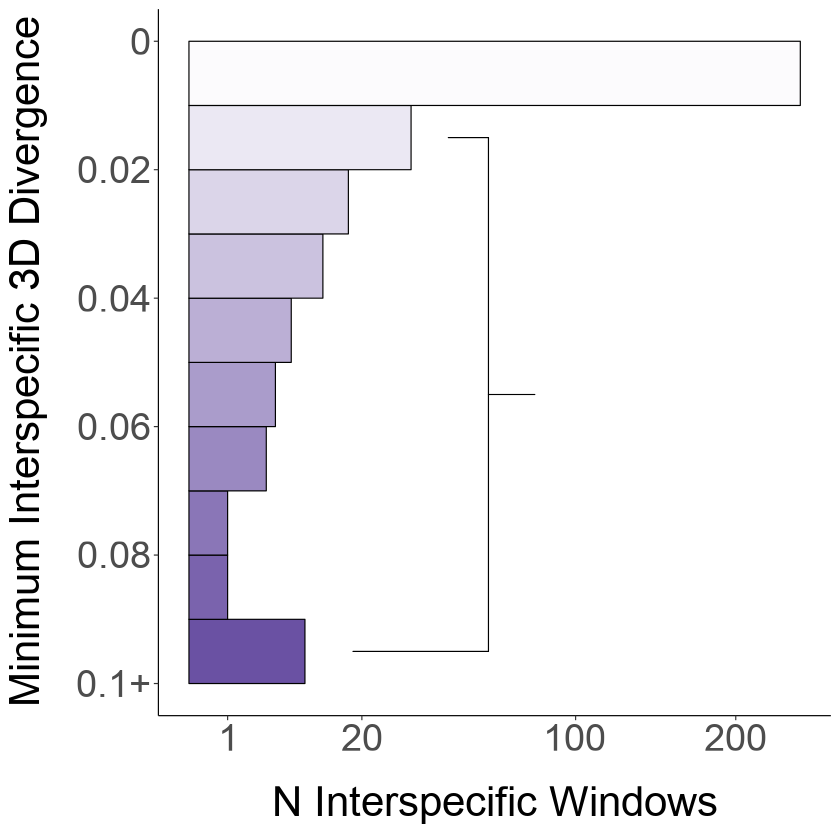

In [109]:
minimum_interspecific_divergence_in_bonobo_chimpanzee_clustering_windows <- ggplot(ppn_pt_window_stats_binned_minimum, aes(y = minimum, fill = factor(..y..))) + #fill = factor(..y..)
geom_histogram(binwidth = 0.01, center = 0.005, color = 'black', size = (0.125/0.377)) +
scale_y_reverse(breaks = seq(0, 0.1, by = 0.02), labels = c('0','0.02','0.04','0.06','0.08','0.1+')) +
scale_x_continuous(breaks = c(1,20,100,200), labels = c('1','20','100','200')) + coord_trans(x = 'sqrt') +
annotate(geom = 'segment', x = 45, y = 0.015, xend = 60, yend = 0.015, size = (0.125/0.377), lineend = 'round') +
annotate(geom = 'segment', x = 60, y = 0.015, xend = 60, yend = 0.095, size = (0.125/0.377), lineend = 'round') +
annotate(geom = 'segment', x = 18, y = 0.095, xend = 60, yend = 0.095, size = (0.125/0.377), lineend = 'round') +
annotate(geom = 'segment', x = 60, y = 0.055, xend = 80, yend = 0.055, size = (0.125/0.377), lineend = 'round') +
#annotate('text', x = 175, y = 0.055, label = 'Bonobo-Chimpanzee\nDivergent Windows\n(N = 89)', family = 'Arial', size = 9/.pt, hjust = 0.5) + # add manually
scale_y_reverse(breaks = seq(0, 0.1, by = 0.02), labels = c('0','0.02','0.04','0.06','0.08','0.1+')) +
xlab('\nN Interspecific Windows') + ylab('Minimum Interspecific 3D Divergence\n') +
scale_fill_manual(values = rev(minimum_divergence_palette)) + fig_theme

minimum_interspecific_divergence_in_bonobo_chimpanzee_clustering_windows

In [110]:
ppn_ptr_windows_n_genes_randomization = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/ppn_ptr_windows/ppn_ptr_windows_n_genes_randomization.txt', sep = '\t', header = FALSE)
colnames(ppn_ptr_windows_n_genes_randomization ) <- c('N')
head(ppn_ptr_windows_n_genes_randomization)

,N
,<int>
1,705
2,685
3,571
4,745
5,629
6,546


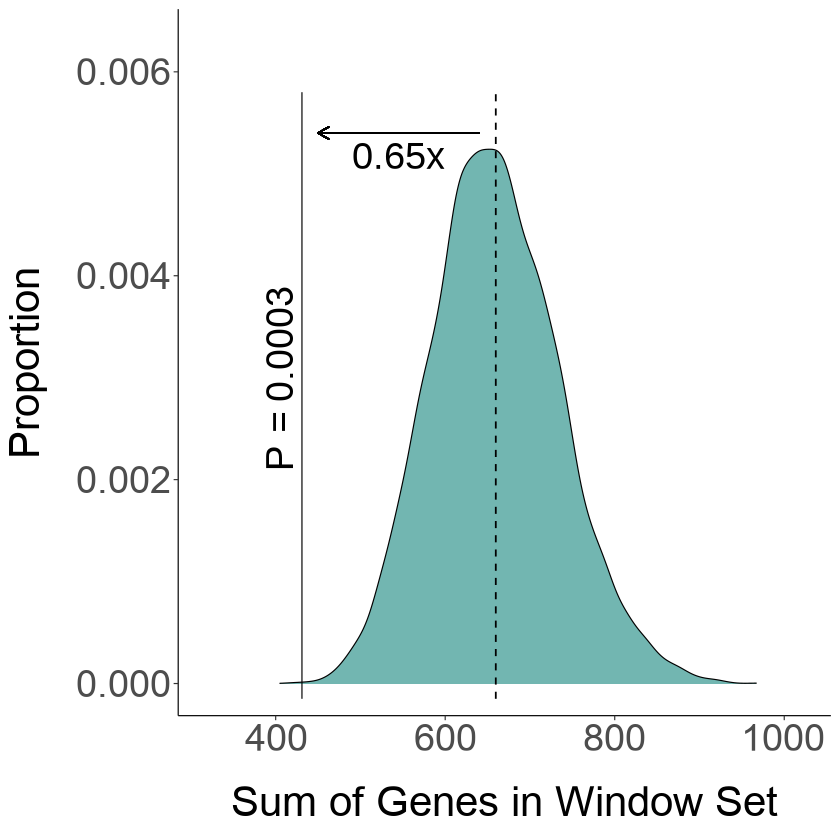

In [111]:
ppn_ptr_windows_n_genes_randomization_plot <- ggplot(ppn_ptr_windows_n_genes_randomization, aes(x = N)) +
geom_density(fill = '#35978f', alpha = 0.7, size = (0.125/0.377)) +
annotate(geom = 'segment', x = 431, y = -0.00015, xend = 431, yend = 0.0058, linetype = 'solid', color = 'black', size = (0.125/0.377)) +
annotate(geom = 'segment', x = 659.6825, y = -0.00015, xend = 659.6825, yend = 0.0058, linetype = 'dashed', color = 'black', size = 0.5) +
geom_segment(x = 640, y = 0.0054, xend = 450, yend = 0.0054, lineend = 'round', linejoin = 'round', size = 0.4, arrow = arrow(length = unit(0.1, 'inches'))) +
annotate('text', x = 405, y = 0.003, label = 'italic(P) == 0.0003', parse = TRUE, family = 'Arial', size = 9/.pt, angle = 90) +
annotate('text', x = ((640-450)/2) + 450, y = 0.005175, label = '0.65x', size = 9/.pt) +
xlab('\nSum of Genes in Window Set') + ylab('Proportion\n') + coord_cartesian(xlim = c(320,1020), ylim = c(0,0.0063)) + 
scale_x_continuous(breaks=seq(400, 1000, 200)) + fig_theme

ppn_ptr_windows_n_genes_randomization_plot

In [112]:
N_genes_ppn_ptr_divergent_windows = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/ppn_ptr_windows/ppn_ptr_divergent_windows_genes_counts.txt', sep = '\t', header = TRUE)
head(N_genes_ppn_ptr_divergent_windows)

,window_chr,window_start,window_end,gene_count
,<chr>,<int>,<int>,<int>
1,chr1,126353408,127401984,28
2,chr1,153092096,154140672,7
3,chr1,153616384,154664960,10
4,chr1,173015040,174063616,5
5,chr10,78643200,79691776,1
6,chr10,87556096,88604672,8


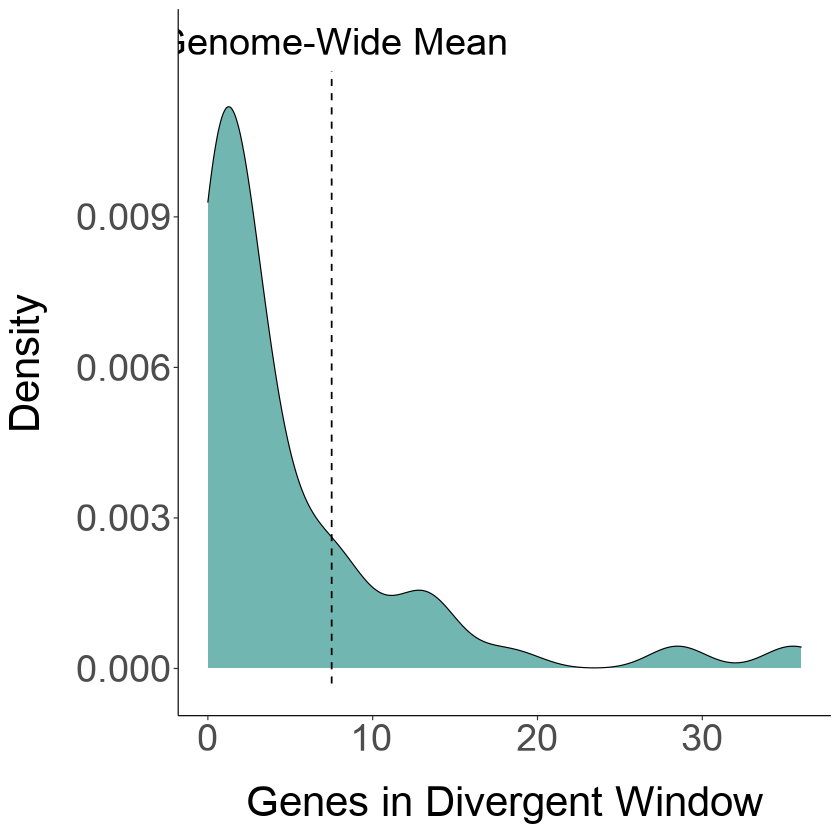

In [113]:
N_genes_ppn_ptr_divergent_windows_density <- ggplot(N_genes_ppn_ptr_divergent_windows, aes(gene_count)) +
geom_density(aes(y = ..count../sum(..count..)), fill = '#35978f', alpha = 0.7, size = (0.125/0.377)) + 
annotate(geom = 'segment', x = 7.511764705882353, y = -0.0003, xend = 7.511764705882353, yend = 0.0119, linetype = 'dashed', color = 'black', size = 0.5) +
annotate('text', x = 7.511764705882353, y = 0.0125, label = 'Genome-Wide Mean', family = 'Arial', size = 9/.pt, hjust = 0.5) +
scale_y_continuous(breaks=seq(0, 0.009, 0.003)) +
xlab('\nGenes in Divergent Window') + ylab('Density\n') + fig_theme 

N_genes_ppn_ptr_divergent_windows_density 

In [114]:
phastCons_conserved_elements_ppn_ptr_divergent_windows = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/phastCons/phastCons_elements_ppn_ptr_divergent_windows.txt', sep = '\t', header = TRUE)
head(phastCons_conserved_elements_ppn_ptr_divergent_windows)

,window,bp_overlap,prop,maximum
,<chr>,<int>,<dbl>,<dbl>
1,chr10_78643200,4816,0.0045928955,0.05234491
2,chr10_87556096,34393,0.0327997208,0.04071716
3,chr11_22544384,484,0.0004615784,0.05017980
4,chr11_77070336,6701,0.0063905716,0.05703871
5,chr11_77594624,12147,0.0115842819,0.12202858
6,chr12_37748736,25173,0.0240068436,0.06287782


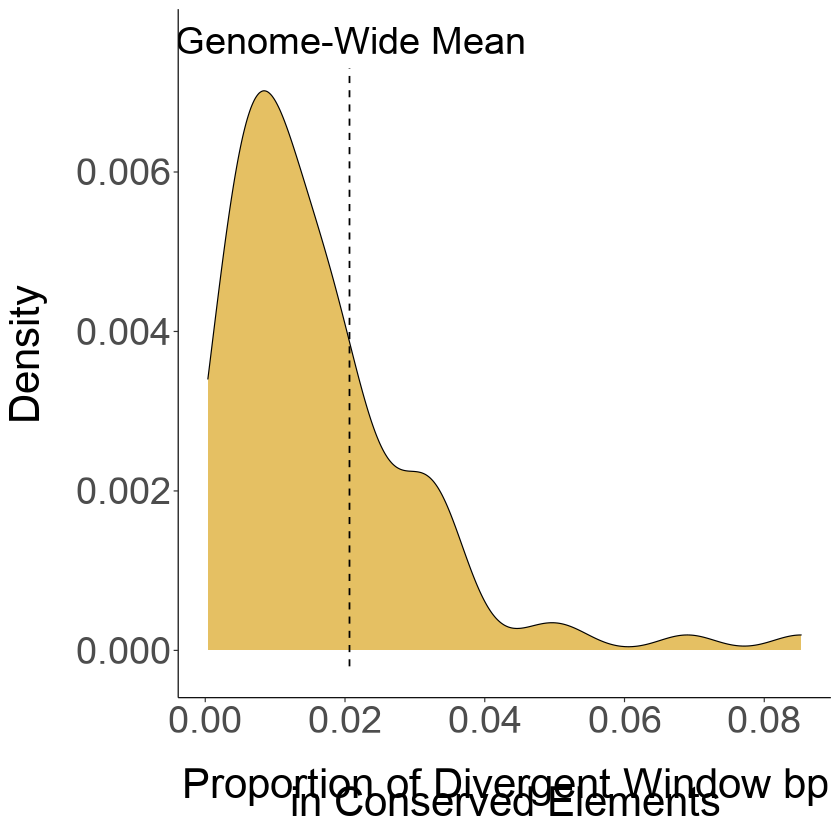

In [115]:
phastCons_conserved_elements_prop_density <- ggplot(phastCons_conserved_elements_ppn_ptr_divergent_windows, aes(prop)) + geom_density(aes(y = ..count../sum(..count..)), fill = '#DAA520', alpha = 0.7, size = (0.125/0.377)) + 
annotate(geom = 'segment', x = 0.020641775044920218, y = -0.0002, xend = 0.020641775044920218, yend = 0.0073, linetype = 'dashed', color = 'black', size = 0.5) +
annotate('text', x = 0.020641775044920218, y = 0.00765, label = 'Genome-Wide Mean', family = 'Arial', size = 9/.pt, hjust = 0.5) +
scale_y_continuous(breaks=seq(0, 0.006, 0.002)) +
xlab('\nProportion of Divergent Window bp\nin Conserved Elements') + ylab('Density\n') + fig_theme

phastCons_conserved_elements_prop_density 

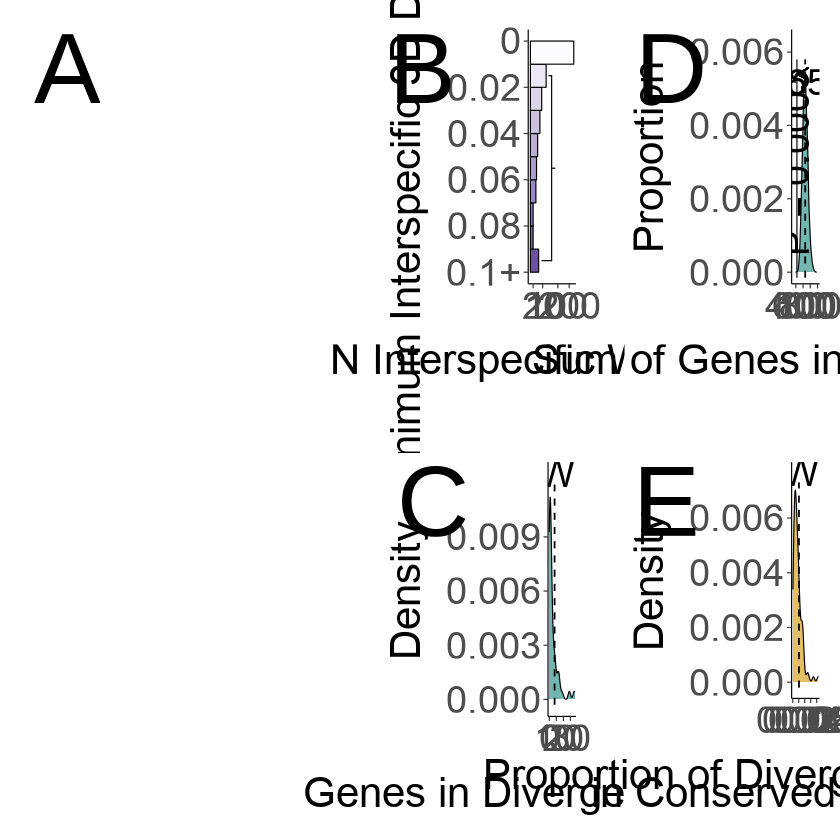

In [116]:
left_column <- plot_grid(NULL, labels = c('A'), label_fontface = 'plain', label_size = 24, ncol = 1, scale = 0.9)
middle_column <- plot_grid(minimum_interspecific_divergence_in_bonobo_chimpanzee_clustering_windows, NULL, N_genes_ppn_ptr_divergent_windows_density, labels = c('B','','C'), label_fontface = 'plain', label_size = 24, ncol = 1, rel_heights = c(0.485,0.03,0.485), scale = 0.9)
right_column <- plot_grid(ppn_ptr_windows_n_genes_randomization_plot, NULL, phastCons_conserved_elements_prop_density, labels = c('D','','E'), label_size = 24, label_fontface = 'plain', ncol = 1, rel_heights = c(0.485,0.03,0.485), scale = 0.9)
plot <- plot_grid(left_column, middle_column, NULL, right_column, nrow = 1, rel_widths = c(0.44,0.27,0.02,0.27))
plot

In [117]:
pdf('main_fig_components/divergent_ppn_ptr_windows.pdf', width = 16, height = 8)
plot
dev.off()

png 
  2

## Phenotype Enrichment <a class = 'anchor' id = 'phenotypeenrichmentfigure'></a>

In [118]:
ppn_ptr_divergent_window_BP_enrichment = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/phenotype_enrichment/enrichment/ppn_ptr_clustering_BP_enrichment.txt', sep = '\t', header = TRUE)
ppn_ptr_divergent_window_GWAS_enrichment = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/phenotype_enrichment/enrichment/ppn_ptr_clustering_GWAS_enrichment.txt', sep = '\t', header = TRUE)
ppn_ptr_divergent_window_HPO_enrichment = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/phenotype_enrichment/enrichment/ppn_ptr_clustering_HPO_enrichment.txt', sep = '\t', header = TRUE)
ppn_ptr_divergent_window_MP_enrichment = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/phenotype_enrichment/enrichment/ppn_ptr_clustering_MP_enrichment.txt', sep = '\t', header = TRUE)

head(ppn_ptr_divergent_window_BP_enrichment)

,label,observed,mean_expected,enrichment,p_value
,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,BP: positive regulation of autophagy of mitochondrion in response to mitochondrial depolarization (GO:1904925),2,0.15845,12.622278,0.007839922
2,BP: regulation of phosphatidylinositol biosynthetic process (GO:0010511),2,0.15979,12.516428,0.008919911
3,BP: negative regulation of sequestering of calcium ion (GO:0051283),4,0.97398,4.106861,0.019059809
4,BP: positive regulation of long-term synaptic depression (GO:1900454),2,0.25757,7.764879,0.022669773
5,BP: release of sequestered calcium ion into cytosol (GO:0051209),4,1.03287,3.872704,0.023059769
6,BP: positive regulation of phospholipid biosynthetic process (GO:0071073),2,0.26151,7.647891,0.024769752


Write a function to plot the enrichment.

In [119]:
phenotype_enrichment_y_axis_label <- expression(-log[10](P)~'\n')

In [120]:
phenotype_enrichment_plot <- function(dataframe, ontology, FDR_threshold) {
    ggplot(dataframe, aes(x = log2(enrichment), y = -log10(p_value))) + geom_point(size = 1.5, color = 'black', alpha = 0.3) + 
    geom_hline(yintercept = -log10(FDR_threshold), linetype = 'dotted', color = 'black', size = (0.125/0.377)) +
    geom_vline(xintercept = 1, linetype = 'solid', color = 'black', size = 0.5) +
    scale_x_continuous(breaks = c(-3,-2,-1,0,1,2,3,4,5,6), limits = c(-3,6)) + scale_y_continuous(breaks = c(0,0.5,1,1.5,2,2.5,3), limits = c(0,3)) +
    ggtitle(paste0(ontology, '\n')) + xlab('\nEnrichment (log2 scale)') + ylab(phenotype_enrichment_y_axis_label) +
    fig_theme + theme(plot.title = element_text(size = 10, hjust = 0.5))
}

In [121]:
BP_enrichment_plot <- phenotype_enrichment_plot(ppn_ptr_divergent_window_BP_enrichment, 'GO Biological Process 2021', 0.0078)
GWAS_enrichment_plot <- phenotype_enrichment_plot(ppn_ptr_divergent_window_GWAS_enrichment, 'GWAS Catalog 2019', 0.0077)
HPO_enrichment_plot <- phenotype_enrichment_plot(ppn_ptr_divergent_window_HPO_enrichment, 'Human Phenotype Ontology', 0.0094)
MP_enrichment_plot <- phenotype_enrichment_plot(ppn_ptr_divergent_window_MP_enrichment, 'Mammalian Phenotype Ontology', 0.0019)

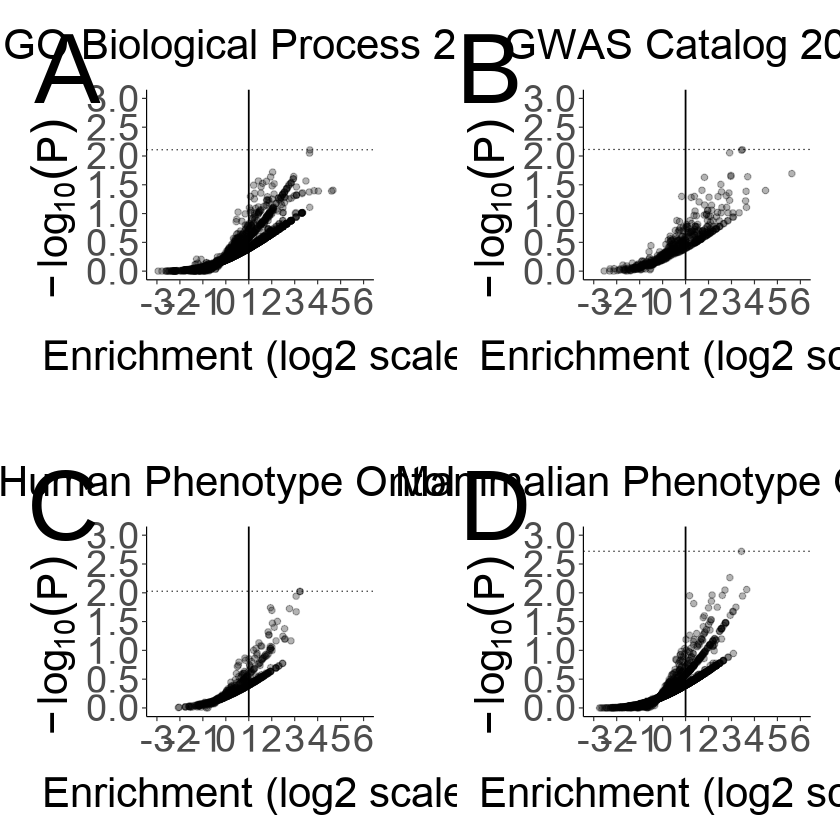

In [122]:
top_row <- plot_grid(BP_enrichment_plot, NULL, GWAS_enrichment_plot, labels = c('A','','B'), label_fontface = 'plain', label_size = 24, nrow = 1, rel_widths = c(0.48,0.04,0.48), scale = 0.9)
middle_row <- plot_grid(NULL)
bottom_row <- plot_grid(HPO_enrichment_plot, NULL, MP_enrichment_plot, labels = c('C','','D'), label_fontface = 'plain', label_size = 24, nrow = 1, rel_widths = c(0.48,0.04,0.48), scale = 0.9)
plot <- plot_grid(top_row, middle_row, bottom_row, ncol = 1, rel_heights = c(0.48,0.04,0.48))
plot

In [123]:
pdf('suppl_figs/phenotype_enrichment_plots.pdf', width = 10, height = 10)
plot
dev.off()

png 
  2

## *In Silico* Mutagenesis Main Figure <a class = 'anchor' id = 'insilicomutagenesismain'></a>

### *In Silico* Mutagenesis Example Window <a class = 'anchor' id = 'insilicomutagenesisexamplewindow'></a>

In [124]:
ppn_ptr_in_silico_mutagenesis = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/in_silico_mutagenesis/ppn_specific_variants_in_ppn_ptr_divergent_windows_in_silico_mutagenesis.txt', sep = '\t', header = TRUE)
head(ppn_ptr_in_silico_mutagenesis)

,chr,pos,ref,alt,window,mse,divergence
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,chr1,126353856,C,T,chr1_126353408,0.0000000060571049,0.000000021419007
2,chr1,126354684,C,T,chr1_126353408,0.0000000005636190,0.000000002657346
3,chr1,126357977,T,C,chr1_126353408,0.0000000018899268,0.000000006916147
4,chr1,126358737,C,T,chr1_126353408,0.0000000013600996,0.000000005963432
5,chr1,126361540,G,T,chr1_126353408,0.0000000004040863,0.000000001929300
6,chr1,126361542,G,A,chr1_126353408,0.0000000053004386,0.000000016955334


In [125]:
chr7_83886080_variants = subset(ppn_ptr_in_silico_mutagenesis, window == 'chr7_83886080')
chr7_83886080_variants$pos = chr7_83886080_variants$pos/1000000

In [126]:
nrow(chr7_83886080_variants)

[1] 1425

In [127]:
0.04^(1/3)

[1] 0.3419952

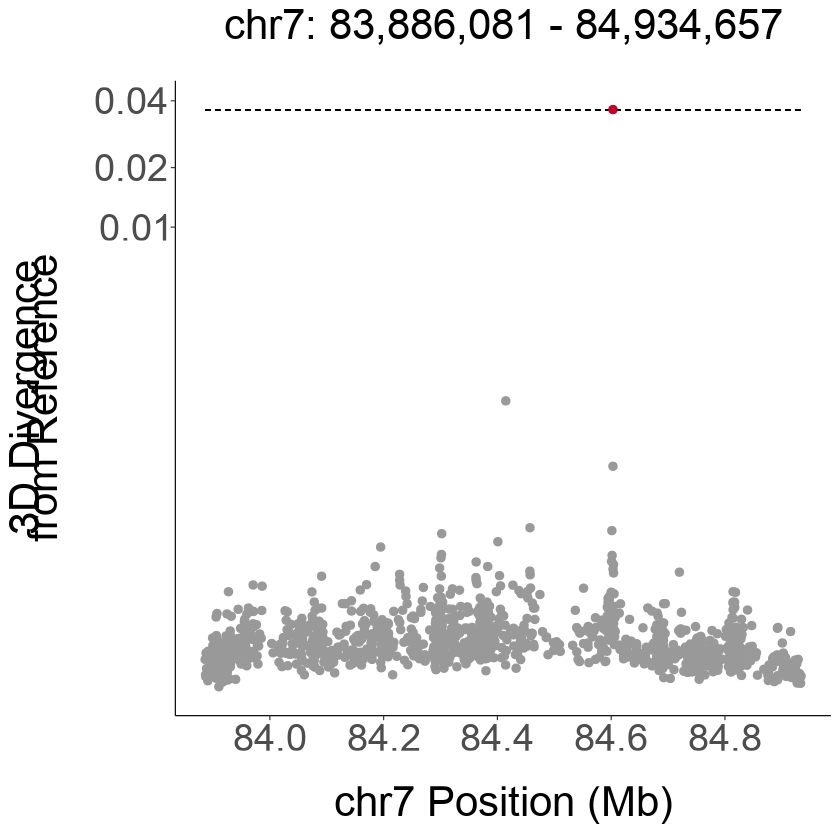

In [128]:
chr7_83886080_variants_manhattan_plot <- ggplot(chr7_83886080_variants, aes(x = pos, y = divergence^(1/3))) + 
geom_segment(x = 83.886081, y = 0.036591365416^(1/3), xend = 84.934657, yend = 0.036591365416^(1/3), linetype = 'dashed', color = 'black', size = (0.125/0.377)) +
geom_point(aes(color = ifelse(divergence > 0.036591365416, '3D-Modifying', 'Non-3D-Modifying')), size = 2) +
coord_trans(y = 'sqrt') + scale_x_continuous(breaks = c(84, 84.2, 84.4, 84.6, 84.8)) +
scale_y_continuous(breaks = c(0.215443469003188,0.271441761659491,0.341995189335339), labels = c(0.01,0.02,0.04)) +
scale_color_manual(values = c('3D-Modifying' = '#c30026', 'Non-3D-Modifying' = 'grey60')) +
ggtitle('chr7: 83,886,081 - 84,934,657\n') + xlab('\nchr7 Position (Mb)') + ylab('3D Divergence\nfrom Reference\n') +
fig_theme + theme(plot.title = element_text(hjust = 0.5, family = 'Arial', size = 10))

chr7_83886080_variants_manhattan_plot

### Explained Divergence <a class = 'anchor' id = 'explaineddivergencefigure'></a>

In [129]:
modifying_variants = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/ppn_ptr_windows/ppn_ptr_divergent_window_3d_modifying_variants_with_CTCF_and_effects.txt', sep = '\t', header = TRUE)
head(modifying_variants)

,chr,pos,ref,alt,ancestral_allele,alt_ancestral_derived,window,mse,divergence,min,max,divergence_explained,CTCF,ref_map_contacts_sum,alt_map_contacts_sum,summed_contact_difference,effect
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,chr1,126940560,C,G,C,derived,chr1_126353408,0.011124950,0.03664670,0.02932252,0.06301477,0.5815573,1,-15.42967,-106.08655,-90.656872,Decrease
2,chr1,153901388,A,T,A,derived,chr1_153616384,0.005189350,0.01714226,0.01650595,0.03228459,0.5309736,1,-13.50155,-72.69640,-59.194849,Decrease
3,chr10,88057593,G,C,G,derived,chr10_87556096,0.018321586,0.03136413,0.02676709,0.04071716,0.7702926,1,-37.24830,-100.21036,-62.962064,Decrease
4,chr10,88057595,G,T,G,derived,chr10_87556096,0.019118623,0.03289305,0.02676709,0.04071716,0.8078425,1,-37.24830,-101.69482,-64.446522,Decrease
5,chr11,77997697,G,A,G,derived,chr11_77070336,0.002093349,0.02519852,0.02399375,0.05703871,0.4417792,1,41.41726,-11.05468,-52.471933,Decrease
6,chr11,77997697,G,A,G,derived,chr11_77594624,0.007758251,0.06911580,0.05035668,0.12202858,0.5663903,1,-37.82816,-39.22159,-1.393439,Decrease


In [130]:
min(modifying_variants$divergence_explained)

[1] 0.08548156

In [131]:
max(modifying_variants$divergence_explained)

[1] 1.173982

In [132]:
bins <- seq(0.05,1.2, by = 0.05)
labels = bins[2:24]
bins

[1] 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70 0.75
[16] 0.80 0.85 0.90 0.95 1.00 1.05 1.10 1.15 1.20

In [133]:
labels

[1] 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70 0.75 0.80
[16] 0.85 0.90 0.95 1.00 1.05 1.10 1.15 1.20

In [134]:
divergence_explained <- subset(modifying_variants, select=c('divergence_explained','CTCF'))
divergence_explained$CTCF <- as.factor(divergence_explained$CTCF)
divergence_explained$divergence_explained_bin <- cut(divergence_explained$divergence_explained, breaks = bins, labels = labels, include.lowest = TRUE)
divergence_explained <- divergence_explained[order(divergence_explained$divergence_explained_bin, divergence_explained$CTCF, decreasing = FALSE), ]
divergence_explained$bin_count <- with(divergence_explained, ave(seq_along(divergence_explained_bin), divergence_explained_bin, FUN = seq_along))
divergence_explained$divergence_explained_bin <- as.numeric(as.character(divergence_explained$divergence_explained_bin))
head(divergence_explained)

,divergence_explained,CTCF,divergence_explained_bin,bin_count
,<dbl>,<fct>,<dbl>,<int>
45,0.08548156,1,0.10,1
24,0.24189972,0,0.25,1
61,0.22025778,1,0.25,2
29,0.26344723,0,0.30,1
56,0.29270874,1,0.30,2
40,0.30909068,0,0.35,1


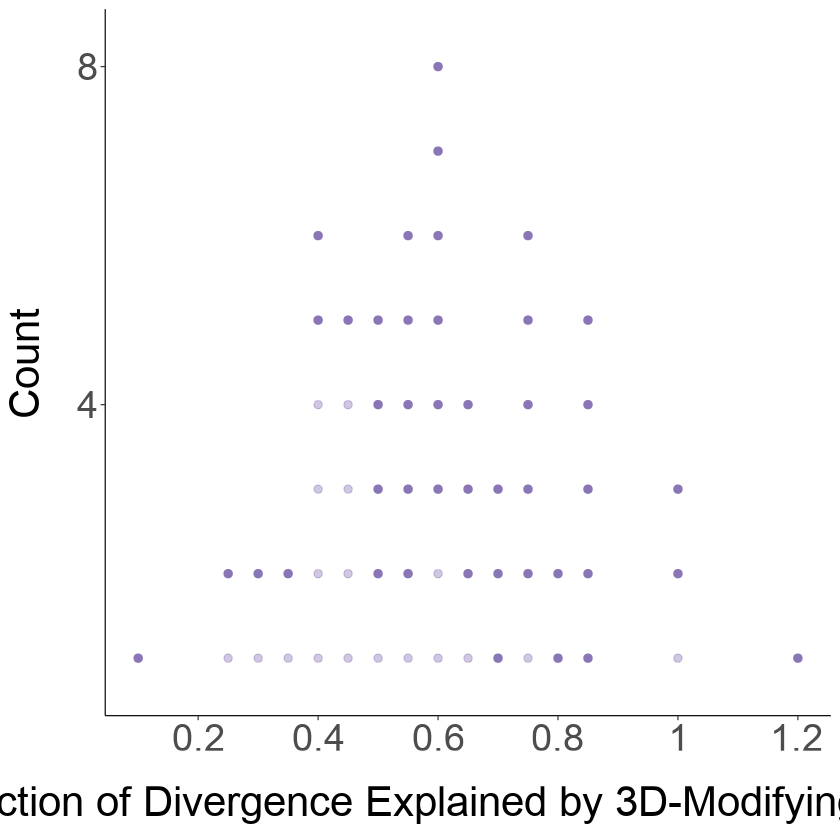

In [135]:
explained_divergence_histogram_plot <- ggplot(divergence_explained, aes(x = divergence_explained_bin, y = bin_count, alpha = CTCF)) + geom_point(size = 2, color = '#8a76b7') +
xlab('\nFraction of Divergence Explained by 3D-Modifying Variant') + ylab('Count\n') +
scale_alpha_discrete(breaks = c(0, 1), guide = 'none', range = c(0.4, 1)) +
coord_cartesian(ylim = c(0.7,8.3)) + scale_x_continuous(breaks = c(0.2,0.4,0.6,0.8,1,1.2), labels = c('0.2','0.4','0.6','0.8','1','1.2')) +
scale_y_continuous(breaks = c(4,8), labels = c('4','8')) + fig_theme

explained_divergence_histogram_plot

### CTCF <a class = 'anchor' id = 'ctcffigure'></a>

In [136]:
x <- c('CTCF Overlap','CTCF Overlap')
overlap <- c('Yes','No')
count <- c(34,17)
CTCF_3d_modifying_variant_overlap <- data.frame(x,overlap,count)
CTCF_3d_modifying_variant_overlap$overlap <- factor(CTCF_3d_modifying_variant_overlap$overlap, levels = c('No','Yes'))
head(CTCF_3d_modifying_variant_overlap)

,x,overlap,count
,<chr>,<fct>,<dbl>
1,CTCF Overlap,Yes,34
2,CTCF Overlap,No,17


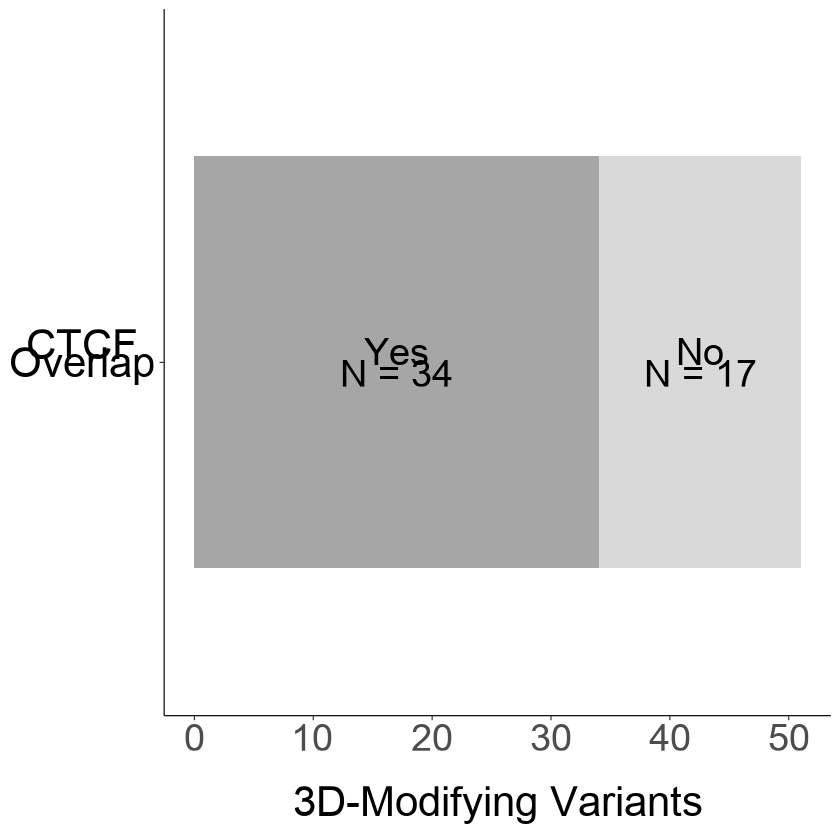

In [137]:
CTCF_overlap_plot <- ggplot(CTCF_3d_modifying_variant_overlap, aes(x = count, y = x, fill = overlap)) + geom_bar(stat = 'identity', width = 0.7) +
#geom_text(aes(label = count), position = position_stack(vjust = 0.5), size = 6, family = 'Arial') +
geom_text(aes(label = paste(overlap,'\nN =',count)), position = position_stack(vjust = 0.5), size = 9/.pt, family = 'Arial') +
scale_fill_manual(values = c('grey85','grey65')) + 
xlab('\n3D-Modifying Variants') + ylab('CTCF\nOverlap\n') +
fig_theme + theme(axis.title.x = element_text(size = 10), axis.title.y = element_text(size = 10, angle = 0, vjust = 0.5), axis.text.x = element_text(size = 9), axis.text.y = element_blank())

CTCF_overlap_plot                         

### Chromatin Contact Effect <a class = 'anchor' id = 'chromatincontacteffectfigure'></a>

In [138]:
direction_of_effect <- subset(modifying_variants, select=c('effect','summed_contact_difference','CTCF'))
direction_of_effect <- na.omit(direction_of_effect)
direction_of_effect$effect <- factor(direction_of_effect$effect, levels = c('Increase','Decrease'))
direction_of_effect$CTCF <- as.factor(direction_of_effect$CTCF)
head(direction_of_effect)

,effect,summed_contact_difference,CTCF
,<fct>,<dbl>,<fct>
1,Decrease,-90.656872,1
2,Decrease,-59.194849,1
3,Decrease,-62.962064,1
4,Decrease,-64.446522,1
5,Decrease,-52.471933,1
6,Decrease,-1.393439,1


In [139]:
nrow(direction_of_effect)

[1] 58

Use the geom_flat_violin function code to generate half violins right of center.

In [140]:
"%||%" <- function(a, b) {
  if (!is.null(a)) a else b
}

geom_flat_violin <- function(mapping = NULL, data = NULL, stat = "ydensity",
                        position = "dodge", trim = TRUE, scale = "area",
                        show.legend = NA, inherit.aes = TRUE, ...) {
  layer(
    data = data,
    mapping = mapping,
    stat = stat,
    geom = GeomFlatViolin,
    position = position,
    show.legend = show.legend,
    inherit.aes = inherit.aes,
    params = list(
      trim = trim,
      scale = scale,
      ...
    )
  )
}

GeomFlatViolin <-
  ggproto("GeomFlatViolin", Geom,
          setup_data = function(data, params) {
            data$width <- data$width %||%
              params$width %||% (resolution(data$x, FALSE) * 0.9)

            # ymin, ymax, xmin, and xmax define the bounding rectangle for each group
            data %>%
              group_by(group) %>%
              mutate(ymin = min(y),
                     ymax = max(y),
                     xmax = x + width / 2,  # Modify this line
                     xmin = x)              # Modify this line
          },

          draw_group = function(data, panel_scales, coord) {
            # Find the points for the line to go all the way around
            data <- transform(data, 
                              xminv = x,             # Modify this line
                              xmaxv = x - violinwidth * (x - xmax))  # Modify this line

            # Make sure it's sorted properly to draw the outline
            newdata <- rbind(plyr::arrange(transform(data, x = xminv), y),
                             plyr::arrange(transform(data, x = xmaxv), -y))

            # Close the polygon: set first and last point the same
            # Needed for coord_polar and such
            newdata <- rbind(newdata, newdata[1,])

            ggplot2:::ggname("geom_flat_violin", GeomPolygon$draw_panel(newdata, panel_scales, coord))
          },

          draw_key = draw_key_polygon,

          default_aes = aes(weight = 1, colour = "grey20", fill = "white", size = 0.5,
                            alpha = NA, linetype = "solid"),

          required_aes = c("x", "y")
)

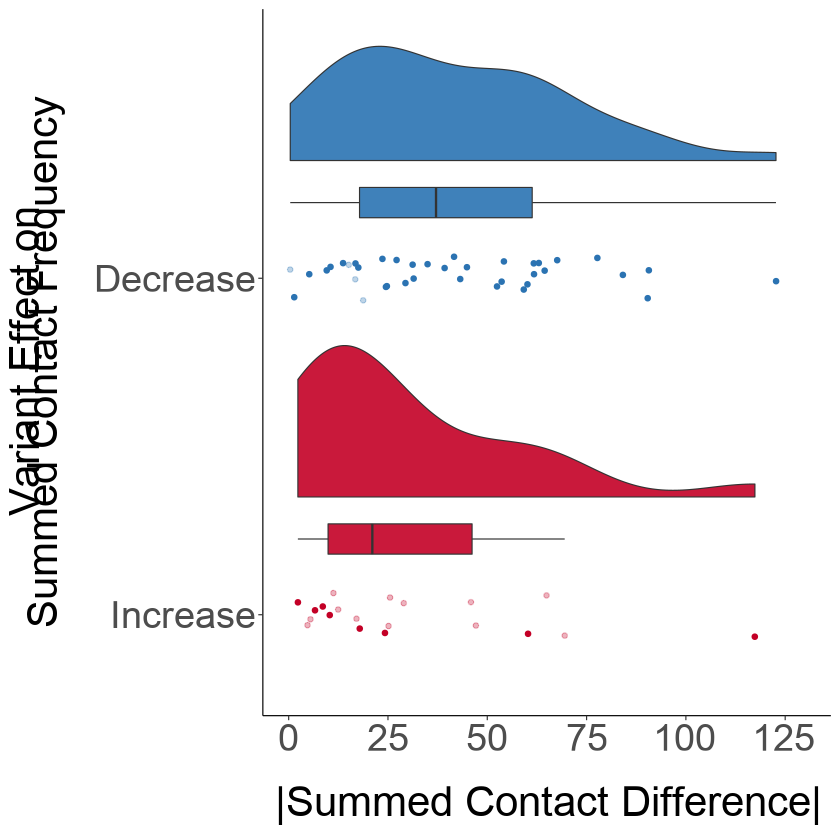

In [141]:
direction_of_effect_plot <- ggplot(direction_of_effect, aes(x = effect, y = abs(summed_contact_difference), fill = effect)) +
geom_flat_violin(position = position_nudge(x = 0.35, y = 0), alpha = 0.9, size = (0.125/0.377)) + geom_boxplot(position = position_nudge(x = 0.225, y = 0), outlier.shape = NA, width = 0.09, alpha = 0.9, size = (0.125/0.377)) +
geom_point(data = direction_of_effect, aes(color = effect, alpha = CTCF), position = position_jitter(width = 0.07), size = 1.2) +
xlab('Variant Effect on\nSummed Contact Frequency\n') + ylab('\n|Summed Contact Difference|') +
scale_color_manual(values = c('#c30026','#2b73b2')) + scale_fill_manual(values = c('#c30026','#2b73b2')) + scale_alpha_discrete(breaks = c(0, 1), guide = 'none', range = c(0.3, 1)) +
scale_x_discrete(expand = c(0, 0.3)) + scale_y_continuous(limits = c(0,130), breaks = c(0,25,50,75,100,125)) + fig_theme + coord_flip()

direction_of_effect_plot

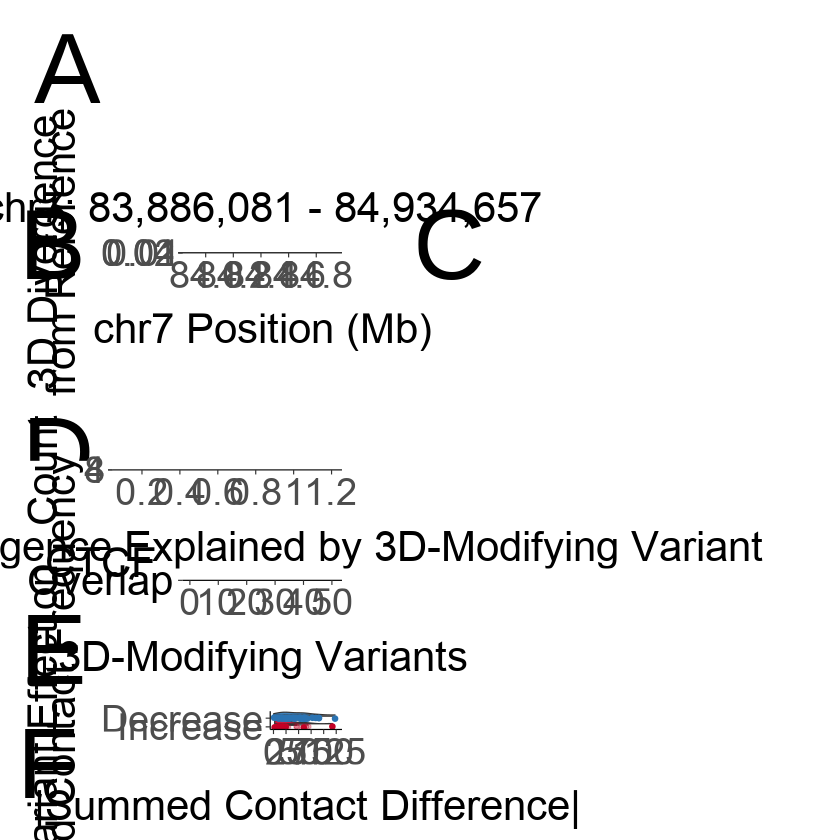

In [142]:
left_column <- plot_grid(NULL, NULL, chr7_83886080_variants_manhattan_plot, NULL, NULL, explained_divergence_histogram_plot, NULL, CTCF_overlap_plot, NULL, direction_of_effect_plot, labels = c('A','','B','','D','','','E','','F'), label_size = 24, label_fontface = 'plain', ncol = 1, rel_heights = c(0.15,0.02,0.18,0.02,0.087,0.083,0.02,0.09,0.02,0.14), scale = 0.9)
right_column <- plot_grid(NULL, NULL, labels = c('','C'), label_size = 24, label_fontface = 'plain', ncol = 1, rel_heights = c(0.17,0.64), scale = 0.9)
plot <- plot_grid(left_column, NULL, right_column, nrow = 1, rel_widths = c(0.44,0.02,0.54))
plot

In [143]:
pdf('main_fig_components/in_silico_mutagenesis_figure.pdf', width = 12, height = 14)
plot
dev.off()

png 
  2

## Gene Expression at Second Example Bonobo-Chimpanzee Divergent Window <a class = 'anchor' id = 'secondexampleexpression'></a>

In [144]:
species <- c('ppn','ppn','ppn','ppn','ppn','ppn','ppn','ppn',
             'ptr','ptr','ptr','ptr','ptr','ptr','ptr','ptr')
tissue <- c('Cerebellum','Cerebellum','Heart','Heart','Kidney','Kidney','Liver','Liver',
            'Cerebellum','Cerebellum','Heart','Heart','Kidney','Kidney','Liver','Liver')
counts <- c(1309,1434,670,450,871,788,316,194,
            1359,713,409,467,869,1010,580,100)
SRI_expression <- data.frame(species,tissue,counts)

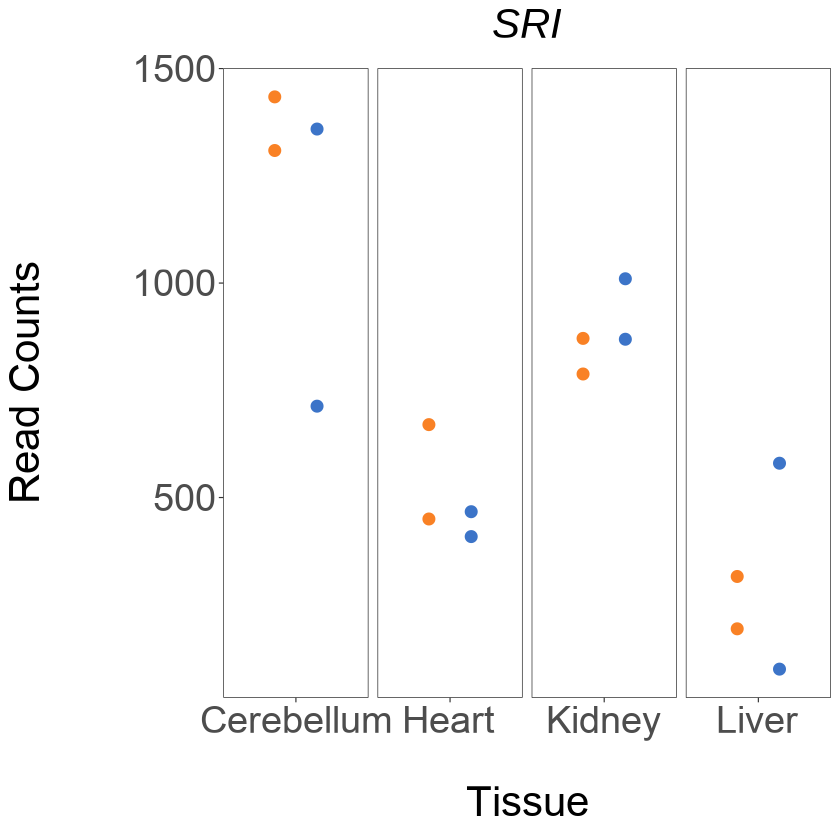

In [145]:
SRI_expression_plot <- gene_expression_plot(SRI_expression, 'SRI')
SRI_expression_plot

In [146]:
species <- c('ppn','ppn','ppn','ppn','ppn','ppn','ppn','ppn',
             'ptr','ptr','ptr','ptr','ptr','ptr','ptr','ptr')
tissue <- c('Cerebellum','Cerebellum','Heart','Heart','Kidney','Kidney','Liver','Liver',
            'Cerebellum','Cerebellum','Heart','Heart','Kidney','Kidney','Liver','Liver')
counts <- c(27,19,330,320,60,74,983,399,
            30,9,1019,272,421,41,1951,289)
STEAP4_expression <- data.frame(species,tissue,counts)

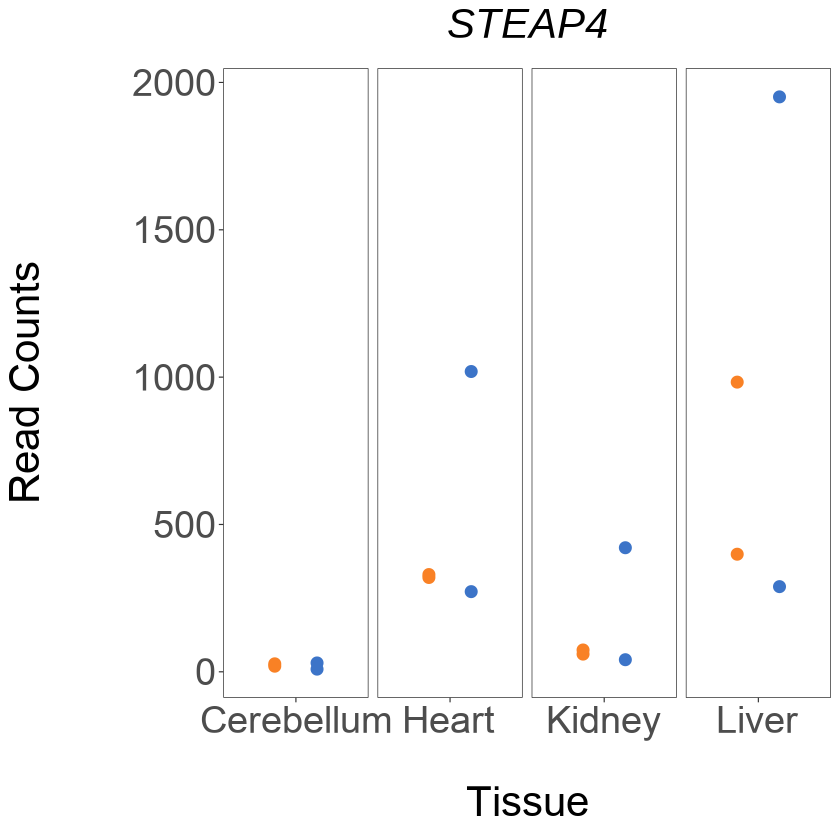

In [147]:
STEAP4_expression_plot <- gene_expression_plot(STEAP4_expression, 'STEAP4')
STEAP4_expression_plot

In [148]:
species <- c('ppn','ppn','ppn','ppn','ppn','ppn','ppn','ppn',
             'ptr','ptr','ptr','ptr','ptr','ptr','ptr','ptr')
tissue <- c('Cerebellum','Cerebellum','Heart','Heart','Kidney','Kidney','Liver','Liver',
            'Cerebellum','Cerebellum','Heart','Heart','Kidney','Kidney','Liver','Liver')
counts <- c(47,78,0,2,1,2,0,0,
            22,11,0,0,0,0,0,0)
ZNF804B_expression <- data.frame(species,tissue,counts)

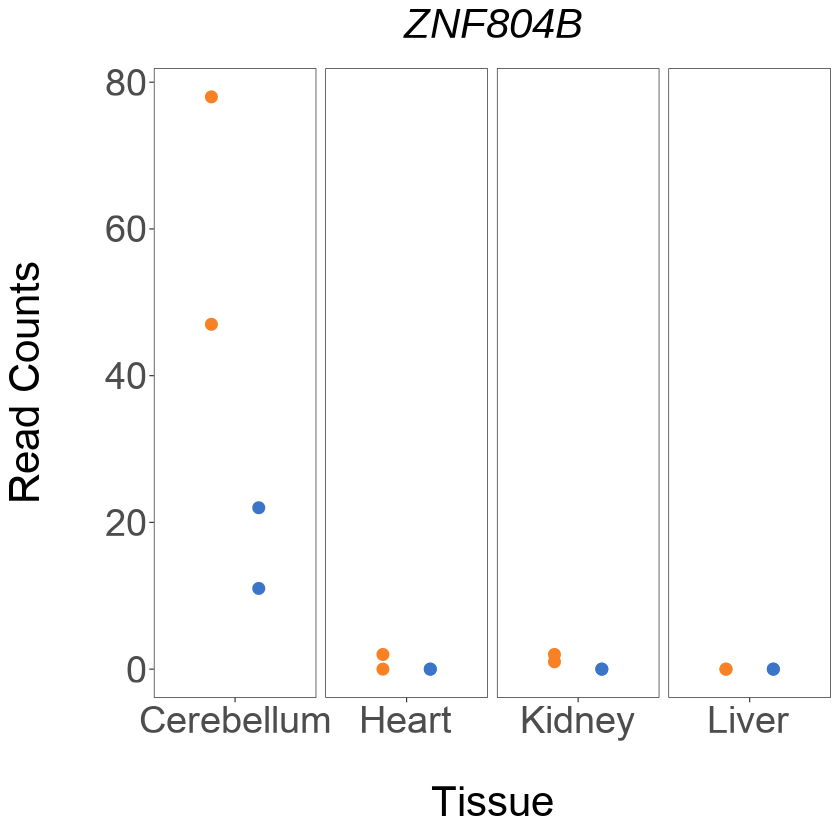

In [149]:
ZNF804B_expression_plot <- gene_expression_plot(ZNF804B_expression, 'ZNF804B')
ZNF804B_expression_plot

In [150]:
species <- c('ppn','ppn','ppn','ppn','ppn','ppn','ppn','ppn',
             'ptr','ptr','ptr','ptr','ptr','ptr','ptr','ptr')
tissue <- c('Cerebellum','Cerebellum','Heart','Heart','Kidney','Kidney','Liver','Liver',
            'Cerebellum','Cerebellum','Heart','Heart','Kidney','Kidney','Liver','Liver')
counts <- c(9,10,0,0,0,0,0,2,
            0,3,0,0,0,1,0,0)
TEX47_expression <- data.frame(species,tissue,counts)

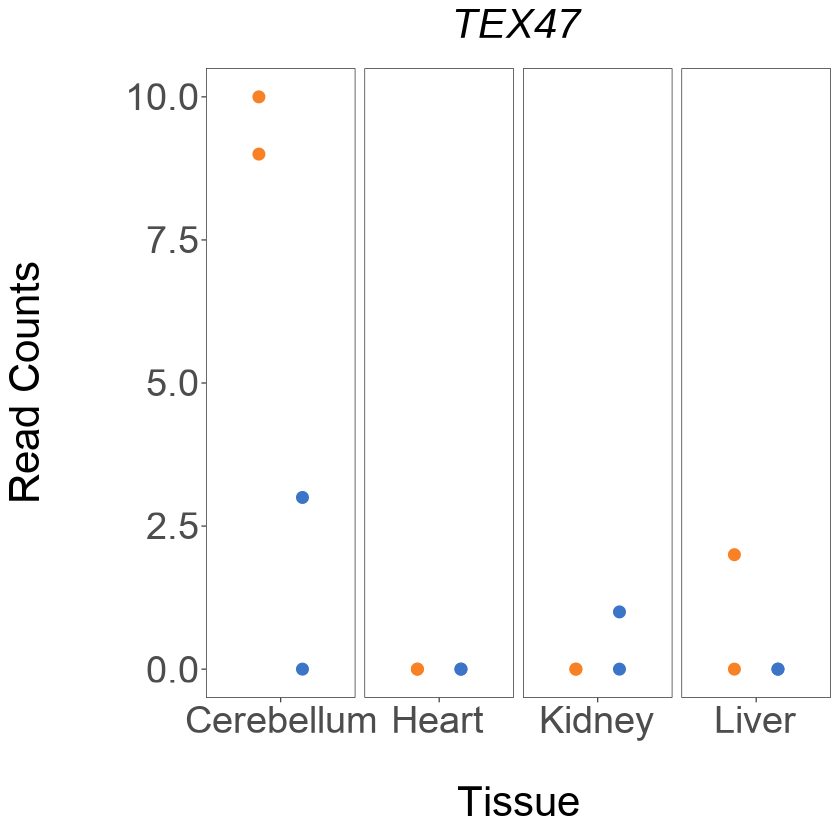

In [151]:
TEX47_expression_plot <- gene_expression_plot(TEX47_expression, 'TEX47')
TEX47_expression_plot

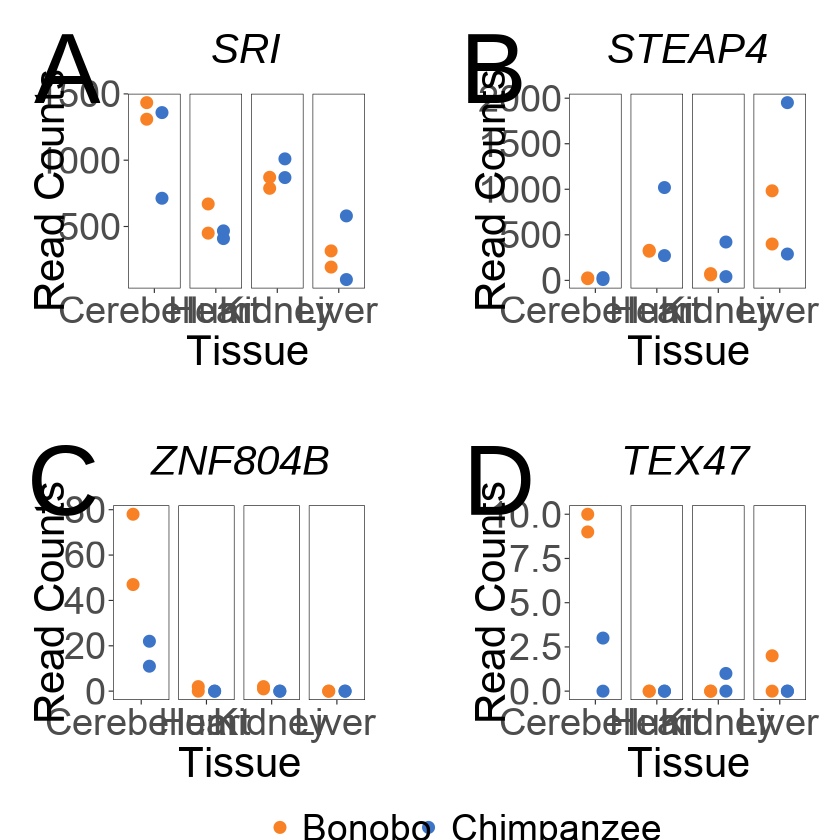

In [152]:
top_row <- plot_grid(SRI_expression_plot, NULL, STEAP4_expression_plot, labels = c('A','','B'), label_size = 24, label_fontface = 'plain', nrow = 1, rel_widths = c(0.475,0.05,0.475), scale = 0.875)
null_row <- plot_grid(NULL)
middle_row <- plot_grid(ZNF804B_expression_plot, NULL, TEX47_expression_plot, labels = c('C','','D'), label_size = 24, label_fontface = 'plain', nrow = 1, rel_widths = c(0.475,0.05,0.475), scale = 0.875)
bottom_row <- plot_grid(expression_plot_legend)
plot <- plot_grid(top_row, null_row, middle_row, bottom_row, ncol = 1, rel_heights = c(0.48,0.01,0.48,0.03))
plot

In [153]:
pdf('suppl_figs/second_example_bonobo_chimpanzee_divergent_window_expression_plot.pdf', width = 10, height = 10)
plot
dev.off()

png 
  2

## 3d Modifying Variant Mutation Matrix and CpG Counts <a class = 'anchor' id = 'mutationmatrix'></a>

In [154]:
modifying_variants_nucleotides = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/ppn_ptr_windows/ppn_ptr_divergent_window_3d_modifying_unique_variant_counts.txt', sep = '\t', header = TRUE)
head(modifying_variants_nucleotides)

,ref,alt,N,prop
,<chr>,<chr>,<dbl>,<dbl>
1,A,A,NA,NA
2,A,C,5,0.09803922
3,A,G,3,0.05882353
4,A,T,2,0.03921569
5,C,A,1,0.01960784
6,C,C,NA,NA


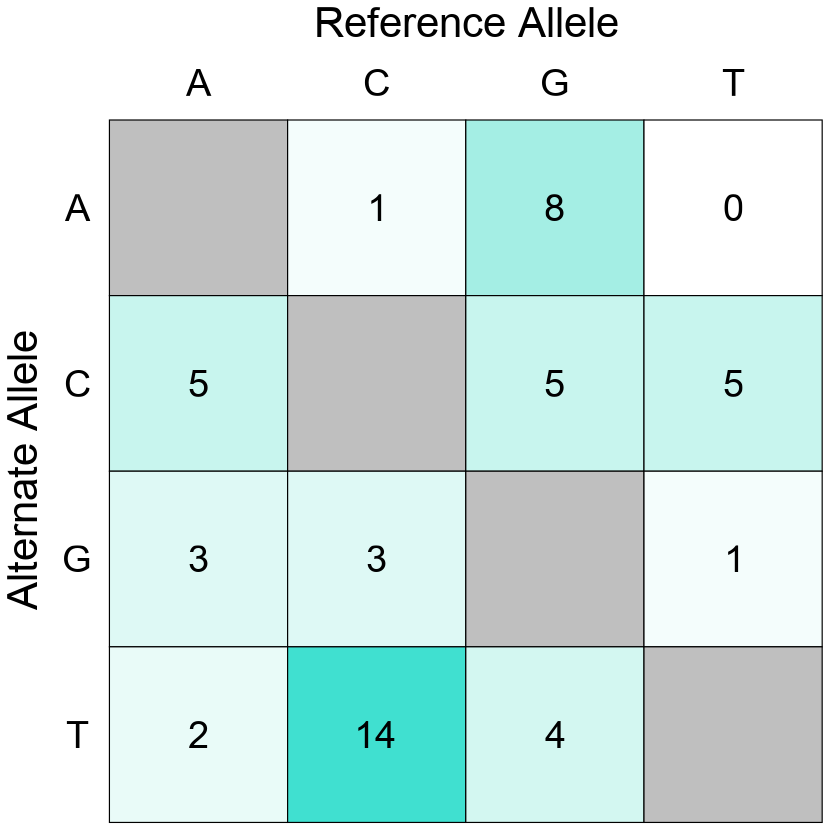

In [155]:
modifying_variant_mutation_matrix <- ggplot(modifying_variants_nucleotides, aes(ref, alt)) + geom_tile(aes(fill = prop), color = 'black', size = (0.125/0.377)) +
geom_text(aes(label = N), size = 9/.pt, family = 'Arial' ) +
xlab('Reference Allele\n') + ylab('Alternate Allele\n') +
scale_x_discrete(position = 'top') + scale_y_discrete(limits = rev) +
scale_fill_gradient(low = 'white', high = 'turquoise', na.value = 'grey75') +
theme_void() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 10), axis.text.x = element_text(size = 9), axis.title.y = element_text(angle = 90), axis.text.y = element_text(size = 9)) +
theme(legend.position = 'none')

modifying_variant_mutation_matrix

In [156]:
dinucleotide <- c('CpA','CpC','CpG','CpT')
count <- c(4,4,3,7)
n_CpGs <- data.frame(dinucleotide,count)
head(n_CpGs)

,dinucleotide,count
,<chr>,<dbl>
1,CpA,4
2,CpC,4
3,CpG,3
4,CpT,7


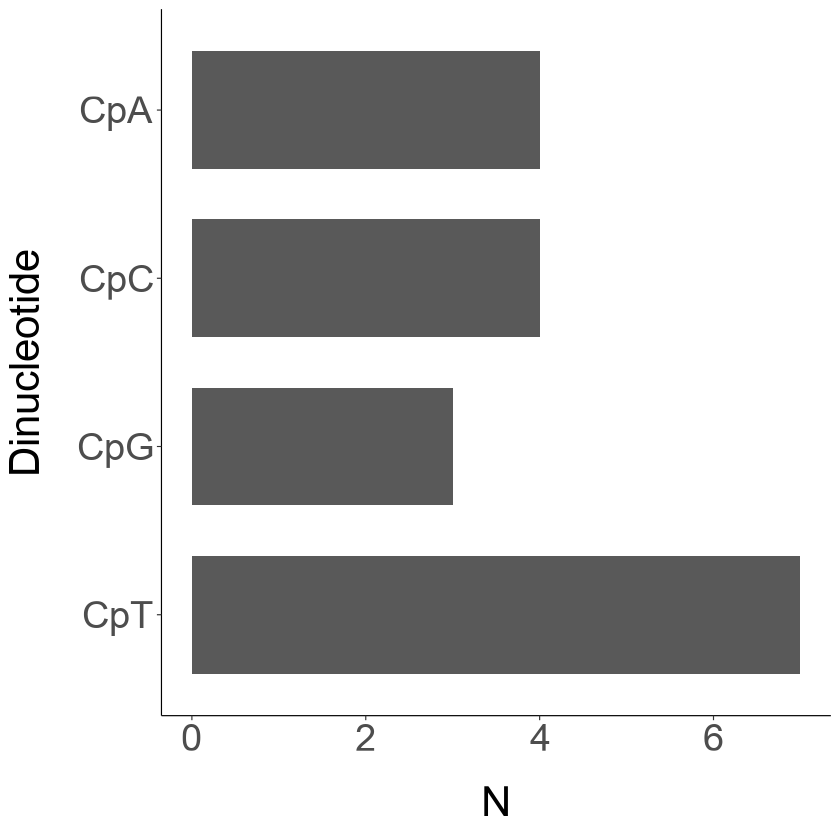

In [157]:
n_CpGs_plot <- ggplot(n_CpGs, aes(x = count, y = dinucleotide)) + geom_bar(stat = 'identity', fill = '#595959', width = 0.7) +
scale_y_discrete(limits = rev) + xlab('\nN') + ylab('Dinucleotide\n') + fig_theme

n_CpGs_plot

In [158]:
row <- plot_grid(modifying_variant_mutation_matrix, NULL, n_CpGs_plot, labels = c('A','','B'), label_size = 24, label_fontface = 'plain', nrow = 1, rel_widths = c(0.45,0.05,0.45), scale = 0.9)

In [159]:
pdf('suppl_figs/3d_modifying_variant_mutation_matrix_and_CpG_counts.pdf', width = 10, height = 5)
row
dev.off()

png 
  2

## Species Differences in Gene Expression <a class = 'anchor' id = 'speciesdifferenceinexpression'></a>

In [160]:
ppn_ptr_windows_species_difference_in_expression_randomization_for_cerebellum = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/RNAseq/analysis/ppn_ptr_windows_species_difference_in_expression_randomization_for_cerebellum.txt', sep = '\t', header = TRUE)
ppn_ptr_windows_species_difference_in_expression_randomization_for_heart = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/RNAseq/analysis/ppn_ptr_windows_species_difference_in_expression_randomization_for_heart.txt', sep = '\t', header = TRUE)
ppn_ptr_windows_species_difference_in_expression_randomization_for_kidney = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/RNAseq/analysis/ppn_ptr_windows_species_difference_in_expression_randomization_for_kidney.txt', sep = '\t', header = TRUE)
ppn_ptr_windows_species_difference_in_expression_randomization_for_liver = read.csv('/wynton/group/capra/projects/pan_3d_genome/data/RNAseq/analysis/ppn_ptr_windows_species_difference_in_expression_randomization_for_liver.txt', sep = '\t', header = TRUE)

In [161]:
head(ppn_ptr_windows_species_difference_in_expression_randomization_for_cerebellum)

,mean,median,max
,<dbl>,<dbl>,<dbl>
1,234.47423,49.0,6642
2,194.42424,50.0,2782
3,86.92857,35.5,1203
4,185.56977,79.5,3198
5,193.42718,91.0,3030
6,133.91964,45.0,1660


In [162]:
species_difference_in_expression_randomization_plot <- function(df, observed_median, lower_cutoff, upper_cutoff, tissue) {
    # Calculate the density values
    density_data <- density(df$median)
    density_df <- data.frame(x = density_data$x, y = density_data$y)
    
    # Plot the density curve
    p <- ggplot(density_df, aes(x = x, y = y)) + geom_line(color = 'black', size = (0.125 / 0.377)) +
        annotate(geom = 'segment', x = observed_median, y = -0.0025, xend = observed_median, yend = max(density_df$y), linetype = 'dashed', color = 'black', size = (0.125 / 0.377)) +
        xlab('\nMedian Species Difference in Gene Expression') + ylab('Proportion\n') +
        ggtitle(paste0(tissue, '\n')) + fig_theme + theme(plot.title = element_text(size = 10, hjust = 0.5))

    print(p)
}


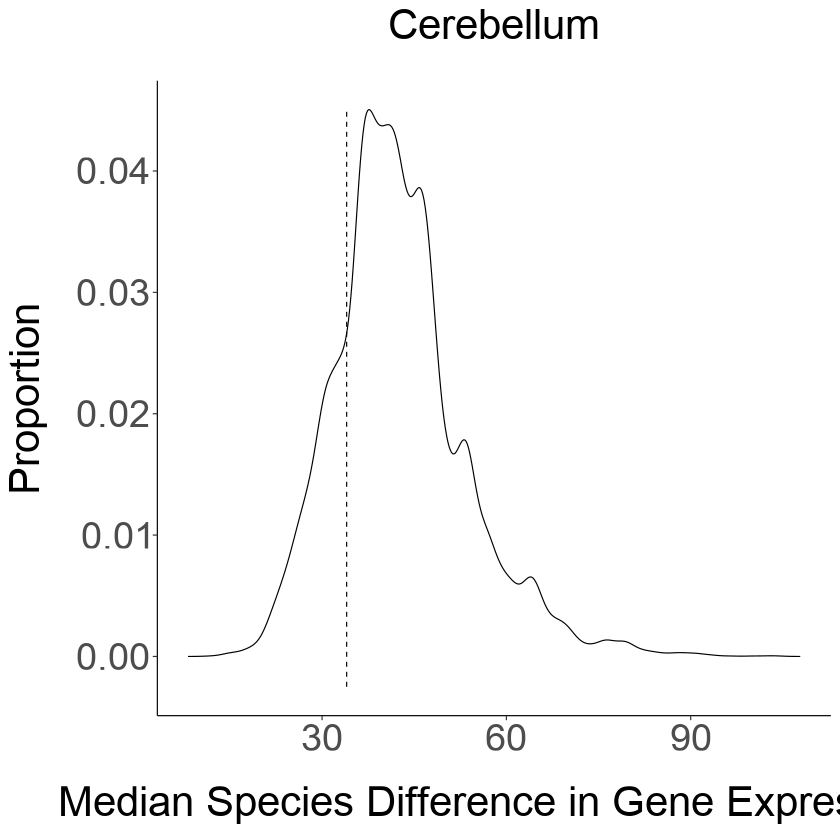

In [163]:
cerebellum_species_difference_in_expression_plot <- species_difference_in_expression_randomization_plot(ppn_ptr_windows_species_difference_in_expression_randomization_for_cerebellum, 34, (34 - 8.75065), (34 + 8.75065), 'Cerebellum')

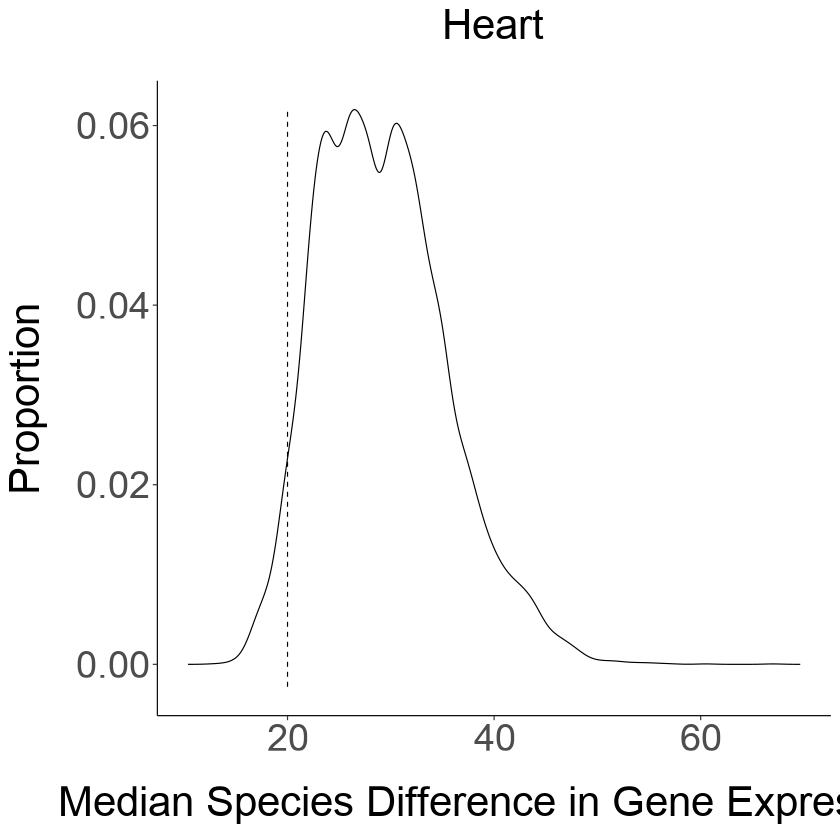

In [164]:
heart_species_difference_in_expression_plot <- species_difference_in_expression_randomization_plot(ppn_ptr_windows_species_difference_in_expression_randomization_for_heart, 20, 14, (20 + 9.23215), 'Heart')

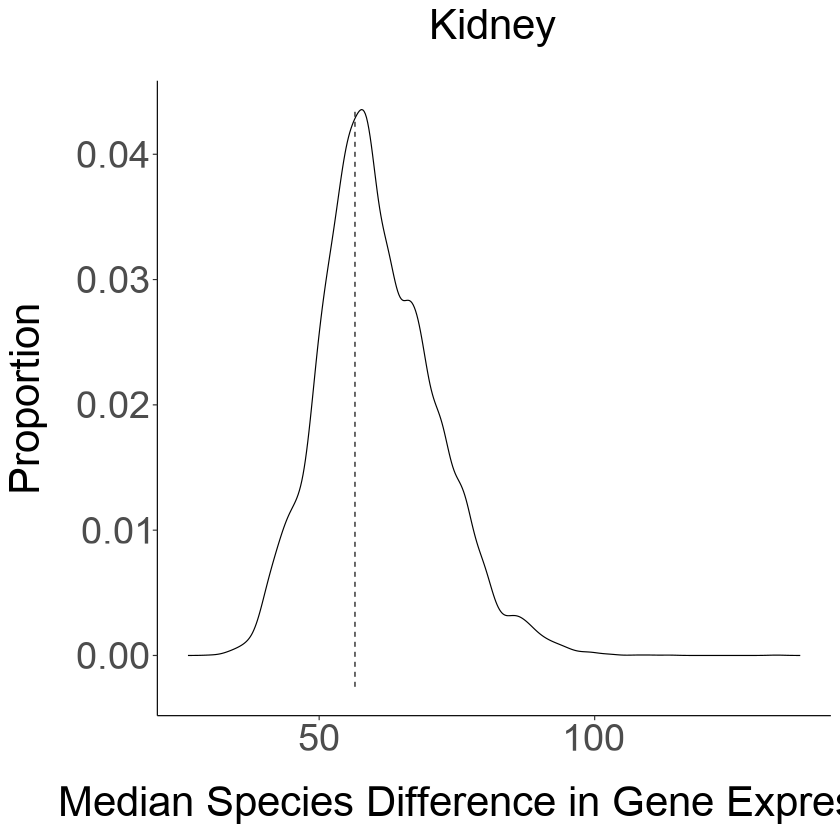

In [165]:
kidney_species_difference_in_expression_plot <- species_difference_in_expression_randomization_plot(ppn_ptr_windows_species_difference_in_expression_randomization_for_kidney, 56.5, (56.5 - 4.386099999999999), (56.5 + 4.386099999999999), 'Kidney')

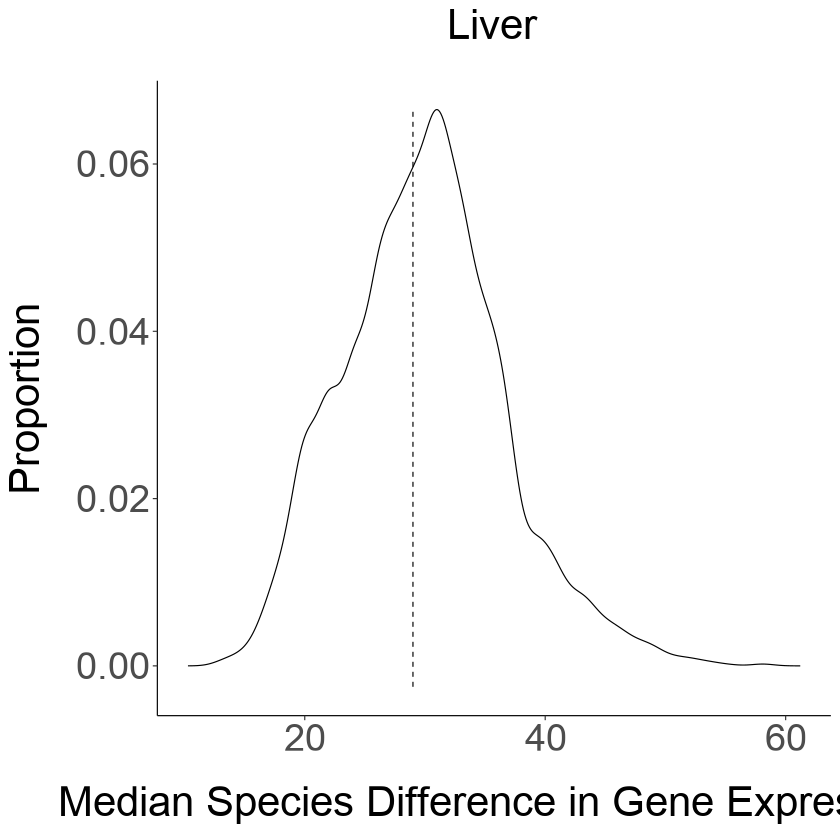

In [166]:
liver_species_difference_in_expression_plot <- species_difference_in_expression_randomization_plot(ppn_ptr_windows_species_difference_in_expression_randomization_for_liver, 29, (29 - 1.0391499999999994), (29 + 1.0391499999999994), 'Liver')

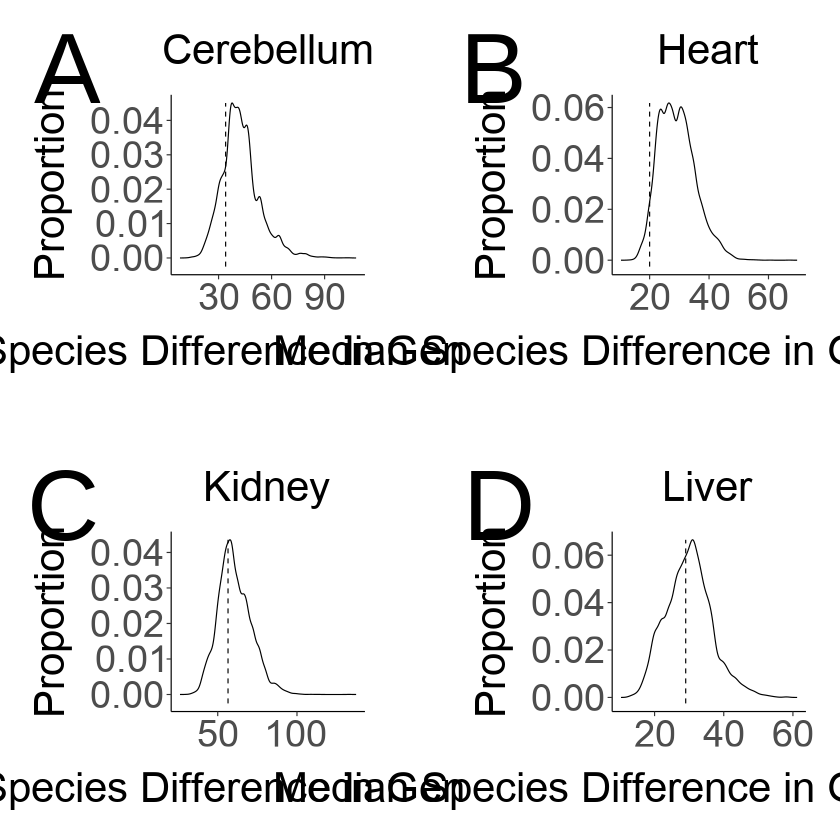

In [167]:
top_row <- plot_grid(cerebellum_species_difference_in_expression_plot, NULL, heart_species_difference_in_expression_plot, labels = c('A','','B'), label_size = 24, label_fontface = 'plain', nrow = 1, rel_widths = c(0.475,0.05,0.475), scale = 0.875)
null_row <- plot_grid(NULL)
bottom_row <- plot_grid(kidney_species_difference_in_expression_plot, NULL, liver_species_difference_in_expression_plot, labels = c('C','','D'), label_size = 24, label_fontface = 'plain', nrow = 1, rel_widths = c(0.475,0.05,0.475), scale = 0.875)
plot <- plot_grid(top_row, null_row, bottom_row, ncol = 1, rel_heights = c(0.48,0.04,0.48))
plot

In [168]:
pdf('suppl_figs/species_difference_in_expression.pdf', height = 10, width = 10)
plot
dev.off()

png 
  2

## Reference Predictions by Cell Type <a class = 'anchor' id = 'referencepredictionsbycelltype'></a>

In [169]:
#reference_comparisons = read.csv('../data/dataframes/reference_cell_type_comparisons.txt', sep = '\t', header = TRUE)
#head(reference_comparisons)

In [170]:
#reference_comparisons$cell_type_dyad <- paste(' ', reference_comparisons$cell_type_1, '\n', reference_comparisons$cell_type_2)
#head(reference_comparisons)

In [171]:
#reference_comparisons_plot <- ggplot(data = reference_comparisons) + geom_violin(aes(x = reorder(cell_type_dyad, -spearman), y = spearman, fill = factor(cell_type_dyad)), width = 1) + 
#stat_summary(aes(x = cell_type_dyad, y = spearman), geom = 'point', fun = 'mean', size = 4) +
#xlab('\nCell Type Comparison') + ylab('Spearman\n') +
#theme_minimal() + theme(text = element_text(family = 'Arial')) +
#theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20)) +
#theme(legend.position = 'none')

#reference_comparisons_plot

In [172]:
#pdf('suppl_figs/reference_comparisons_plot.pdf', height = 12, width = 18)
#reference_comparisons_plot
#dev.off()

## Sample Predictions by Cell Type <a class = 'anchor' id = 'samplepredictionsbycelltype'></a>

In [173]:
#cell_type_correlation = read.csv('../data/dataframes/cell_type_correlation.txt', sep = '\t', header = TRUE)
#head(cell_type_correlation)

In [174]:
#cell_type_correlation_plot <- ggplot(cell_type_correlation, aes(x = divergence_x, y = divergence_y)) + geom_point(alpha = 0.3) +
#xlab('\nHFF 3D Divergence') + ylab('GM12878 3D Divergence\n') +
#theme_minimal() + theme(text = element_text(family = 'Arial')) +
#theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20))

#cell_type_correlation_plot

In [175]:
#png('suppl_figs/cell_type_correlation_plot.png', height = 12, width = 12, units = 'in', res = 300)
#cell_type_correlation_plot
#dev.off()